# Feature Engineerig: Variables Numéricas

## Intro Feature Engineering:

Hasta ahora, lo que hemos hecho es analizar los datos, trabajar con ellos y visualizarlos, lo que nos permite conocer ciertas características del dataset que tenemos para poder afrontar el futuro problema de Machine Learning. Sin embargo, los modelos no pueden tomar los datos "a los bestia" sin realizar ningún tipo de tratamiento. Por lo general, antes de pasar a elegir un modelo para realizar predicciones, es necesario realizar ciertas transformaciones que nos permitan traducir los datos a algo entendible para el algoritmo.

En este punto es donde entra este apartado de Feature Engineering, que básicamente se trata de una serie de técnicas para adaptar nuestros datos a los algoritmos que utilizaremos posteriormente. Este paso es muy importante, ya que podríamos pasar por alto cosas que podrían terminar desembocando en errores, tanto de código (que no nos deje realizar las predicciones) como de concepto (que pese a que podamos llevar a cabo el ejercicio, las predicciones sean como hacerlo aleatoriamente).

En este caso, hemos decidido dividir el 4 apartados en función de los tipos de las variables:
  - Numéricas: (este notebook) Comenzaremos hablando de los mecanismos para tratar variables numéricas, que son aquellas que, como su propio nombre indica, se expresan con números que indican la magnitud de la relación entre ellas. Con esto queremos decir que estas variables no deberían hacer referencia a grupos sin un orden claro entre ellos, como los colores, ya que en ese caso serían categóricas y se interpretarían mejor como tal (siguiente punto). Es decir, si tenemos una variable que toma valores ``0, 1 o 2``, podríamos pensar que, como son números, es numérica. Sin embargo, puede que estos números hagan referencia a 3 clases en las que se agrupa los registros de nuestro dataset, como la clase social de los pasajeros del Titanic. Como podrás ver, dependerá mucho del contexto de nuestros datos, y eso hará que podamos jugar con las variables discretas, que, en caso de tener pocos valores distintos, igual observamos mejores resultados tratándolas como categóricas, pese a que indiquen cierta relación entre ellas.
  
  - Categóricas: Las variables categóricas contienen un número finito de categorías o grupos distintos. Los datos categóricos pueden no tener un orden lógico. Por ejemplo, los predictores categóricos incluyen sexo, tipo de material o método de pago.
  
  - Temporales: Las variables temporales necsitarán tratarse de manera diferente. Generalmente, los datos temporales vendrán como strings que deberemos convertir a temporales (``datetime`` o ``timestamp``). Generalmente, esta conversión nos facilitará trabajar con estos datos, pudiendo extraer fácilmente sus características (año, mes, semana...) y así poder detectar patrones como los relacionados con las variaciones estacionales.
  
  - Textuales: Ya hemos visto alguna que otra herramienta para tratar textos, pero en muchas de las operaciones que hemos hecho, lo que terminamos obteniendo eran otros textos, por lo que nuestro modelo no podrá procesarlo. Por ello, lo que veremos aquí va a ir un paso más allá. En este apartado conseguiremos convertir nuestros datos string en algo interpretable por un algoritmo, para lo que nos basaremos en proyectar las palabras sobre un espacio dimensional. Para ello, veremos qué es el ``bag-of-words``, los ``n-gramas``, ``tokenizar``...
  
 
Pero vamos paso a paso. Y lo primero de todo esto son las variables numéricas:

## Variables numéricas


Tenemos que preparar nuestros datos para trabajar con los modelos de Machine Learning. En el caso de variables numéricas, tenemos a nuestra disposición una serie de herramientas que deberemos de utilizar antes de empezar a trabajar con los algoritmos. Algunos de esos métodos son:

    Tratamiento de nulos
    Manejo de outliers
    Escalado y transformación de variables
    Reducción de dimensionalidad (PCA)
    Agrupaciones
    Transformaciones matemáticas (de distribuciones)
   

Como ya hemos visto el tratamiento de nulos y cómo debemos trabajar con los *outliers*, nos centraremos en el resto de herramientas:


El orden de magnitud de las variables de nuestro dataset es una consideración muy importante al crear modelos de machine learning. Básicamente, el escalado de las variables es relevante porque:

  - Los coeficientes de regresión de los modelos lineales están directamente influenciados por la escala de la variable.
  - Las variables con mayor magnitud (o mayor rango de valores) dominan sobre aquellas con menor magnitud (o menor rango de valores).
  - El descenso de gradiente (uno de los algoritmos de optimización más populares en aprendizaje automático) converge más rápido cuando las características están en escalas similares.
  - El escalado de características ayuda a disminuir el tiempo para encontrar vectores de soporte para el algoritmo SVM (Support Vector Machine), que veremos más adelante.
  - La distancia euclídea, utilizada en muchos algoritmos, es sensible a la magnitud de las características.
  - Algunos algoritmos, como PCA (que veremos un poco más adelante), requieren que las características estén centradas en 0.

Los modelos de machine learning afectados por el escalado de las variables son:

  - Regresiones lineales y logísticas
  - Redes Neuronales
  - Support Vector Machines
  - KNN
  - Clustering K-Means
  - Linear Discriminant Analysis (LDA)
  - Análisis de Componentes Principales (PCA)


## Escalado de variables

El escalado de variables se refiere a los métodos o técnicas que se utilizan para normalizar el rango de variables de nuestros datos, o en otras palabras, los métodos para establecer el rango de valores de características dentro de una escala similar a todas ellas. El escalado es generalmente el último paso en la canalización de preprocesamiento de datos, que se realiza justo antes de entrenar los algoritmos de aprendizaje automático.

## Escalado de variables: Normalización con Z-Score y escalado Min-Max

### Normalización Z-Score

El resultado de la estandarización (tipificación o normalización Z-score) es que las variables serás reescaladas para que tengan propiedades de una distribución normal estándar con: $\mu = 0$ y $\sigma = 1$

donde $\mu$ es la media y $\sigma$ es la desviación estándar. El valor en unidades tipificadas (también llamados z-scores) de las muestras son calculados como:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Estandarizar variables para centrarlas en torno a 0 con una desviación estándar de 1 no solo es importante si estamos comparando medidas que tienen unidades diferentes, sino que también es un requisito básico para muchos de los algoritmos de machine learning que veremos.


Según la documentación de [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), librería de referencia para todo lo que a machine learning concierne:

    La estandarización de un conjunto de datos es un requisito común para muchos de los algoritmos de machine learning: podrían comportarse de forma impredecible si las características individuales no se parecen en mayor o menor medida que datos normalmente distribuidos (por ejemplo, gaussiano con media 0 y varianza unitaria).

### Escalado Min-Max

Una alternativa a la normalización Z-score (o estandarización) es el llamado "Escalado Min-Max" (o Min-Max scaling), al que muchas veces se le hace referencia simplemente con el nombre de "normalización", fuente de confusión debido a la ambigüedad.

En este enfoque, los datos se escalan a un rango fijo, generalmente de 0 a 1.
El coste de tener este rango limitado, en contraste con la estandarización, es que terminaremos con desviaciones estándar más pequeñas, lo que puede suprimir el efecto de valores atípicos.

El escalado Min-Max (mínimo-máximo) se realiza normalmente mediante la siguiente ecuación:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

### ¿Estandarización Z-score o escalado Min-Max?

La respuesta a esta pregunta es simple: depende. Y es que no existe una respuesta obvia ante esta pregunta sino que variará en función del caso de uso.


Por ejemplo, en los algoritmos de clustering, la estandarización puede ser especialmente crucial para comparar similitudes entre características basadas en ciertas medidas de distancia. Otro ejemplo que podríamos destacar es el PCA (Análisis de componentes principales), donde generalmente preferiremos la estandarización sobre la escala Min-Max, ya que estaremos interesados en los componentes que maximicen la varianza (aunque dependerá de diversos factores, como el uso de matriz de correlación en lugar de la de covarianza).

Sin embargo, esto no significa que el escalado Min-Max no sea útil. Un entorno en el que se utiliza extensamente es el procesamiento de imágenes, donde las intensidades de píxeles deben normalizarse para ajustarse a un cierto rango (es decir, de 0 a 255 para el rango de color RGB). Además, los algoritmos de redes neuronales típicas que veremos requieren datos en una escala de 0-1.

<br>

Así que, una vez hemos visto la parte teórica, pasemos a la parte divertida:

## Manos a la obra: Estandarización y normalización con Python

Para ello, en vista de lo que hemos estudiado anteriormente, podríamos realizar la normalización y estandarización con operaciones de NumPy, replicando las fórmulas que hemos visto para su cálculo. Sin embargo, existe otra forma más conveniente (y más sencilla para nosotros) de realizar esta tarea, para la cual utilizaremos el módulo de preprocesamiento de datos de la librería de Python [scikit-learn](http://scikit-learn.org ).

A continuación, para el resto de esta explicación, nos basaremos en un dataset de UCI, un repositorio de machine learning de la Universidad de California. En concreto, utilizaremos un dateset del análisis de componentes químicos para determinar el origen de los vinos (http://archive.ics.uci.edu/ml/datasets/Wine).

Nuestro dataset consiste en 3 clases diferentes de vino, donde cada registro se corresponde con una muestra particular de vino.

El dataset contiene la variable con la clase y unas 13 variables explicativas, pero para este ejemplo nos quedaremos con la primera columna y las 2 primeras varaibles explicativas, que son:
1) Alcohol

2) Malic acid


#### Cargando nuestro dataset de vinos

In [429]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
                 header=None,
                 usecols=[0,1,2])

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


Como podemos ver en la tabla anterior, las variables Alcohol (en porcentaje/volumen) y Ácido málico (en g/l) se miden en diferentes escalas, por lo que es necesario realizar un escalado antes de cualquier comparación o combinación de estos datos.

#### Estandarización y escalado Min-Max

In [432]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
type(scaler)
scaler.fit(df[['Alcohol', 'Malic acid']])

StandardScaler()

Una vez le hemos pasado los datos al *scaler*, este se encargará de estudiar los datos y realizar sus cálculos. Por ello, podremos sacar algún parámetro como la media o la varianza:

In [436]:
print(scaler.mean_)
print(scaler.var_ )
df.shape

[13.00061798  2.33634831]
[0.65535973 1.24100408]


(178, 3)

In [437]:
df[['Alcohol', 'Malic acid']].head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


Aplicamos el *scaler* a los datos:

In [444]:
np_std = scaler.transform(df[['Alcohol', 'Malic acid']])
np_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

Si queremos ver los datos escalados, los tenemos disponibles en el objeto que nos acabamos de crear, pero será un array (no un DataFrame):

In [445]:
np_std[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

Esta operación también podríamos haberla realizado en un solo paso:

In [447]:
scaler2 = preprocessing.StandardScaler().fit_transform(df[['Alcohol', 'Malic acid']])

Para hacer el escalado Min-Max, se haría de la siguiente manera:

In [448]:
minmax = preprocessing.MinMaxScaler()

np_minmax = minmax.fit_transform(df[['Alcohol', 'Malic acid']])

Al igual que antes, nos devuelve un array:

In [453]:
np_minmax[:5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [454]:
from sklearn import preprocessing

print('Media después de estandarizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(np_std[:,0].mean() , np_std[:,1].mean() ))
print('\nDesviación típica después de estandarizar:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format( np_std[:,0].std() , np_std[:,1].std() ))

Media después de estandarizar:
Alcohol=-0.00, Malic acid=-0.00

Desviación típica después de estandarizar:
Alcohol=1.00, Malic acid=1.00


In [455]:

print('Valor mínimo después del escalado min-max:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(np_minmax[:,0].min() , np_minmax[:,1].min()))
print('\nValor máximo después del escalado min-max:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format( np_minmax[:,0].max() , np_minmax[:,0].max() ))


Valor mínimo después del escalado min-max:
Alcohol=0.00, Malic acid=0.00

Valor máximo después del escalado min-max:
Alcohol=1.00, Malic acid=1.00


#### Visualizando los resultados

## EJERCICIO:

Ya que esto es bastante teórico, y para que no os aburráis, vamos a trabajar un poquito. ¿Qué vamos a hacer? Bueno, vamos a representar lo que acabamos de obtener. Para ello, utiliza un gráfico de dispersión con los datos originales, tras el estandarizado y tras el escalado min-max:

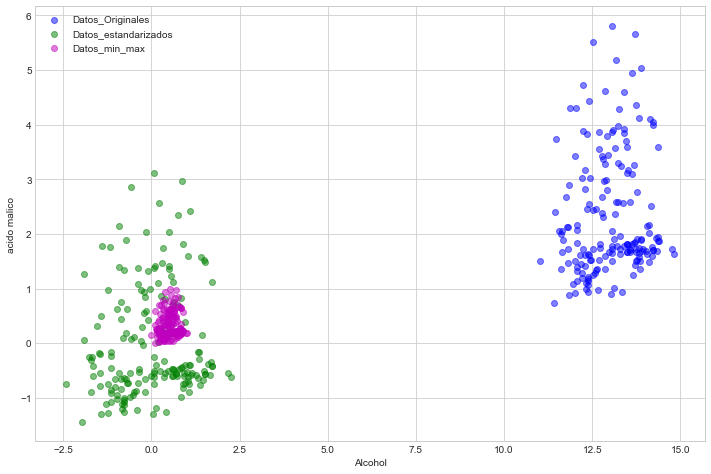

In [459]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.figure(figsize=(12,8))
plt.scatter(df['Alcohol'], df['Malic acid'], color = 'b', label = 'Datos_Originales', alpha = 0.5)
plt.scatter(np_std[:, 0], np_std[:, 1], color = 'g', label = 'Datos_estandarizados', alpha = 0.5)
plt.scatter(np_minmax[:, 0], np_minmax[:, 1], color = 'm', label = 'Datos_min_max', alpha = 0.5)
plt.xlabel("Alcohol")
plt.ylabel("acido malico")
plt.legend()


## EJERCICIO:

Para complementar la gráfica anterior, representa 3 gráficas nuevas, 1 para los datos originales, otra para su estandarizado y otra para su escalado min-max. PAra cada una deellas, representa de diferentes colores los puntos de las 3 clases de vinos:

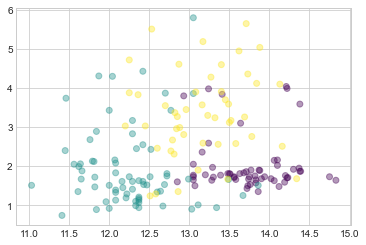

In [492]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x0 = df['Alcohol']
y0 = df['Malic acid']

x1 = np_std[:,0]
y1 = np_std[:,1]

x2 = np_minmax[:,0]
y2 = np_minmax[:,1]

plt.scatter(x0, y0, c=df['Class label'], cmap='viridis', alpha=0.4);

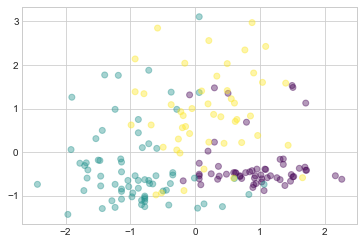

In [493]:
plt.scatter(x1, y1, c=df['Class label'], cmap='viridis', alpha=0.4);

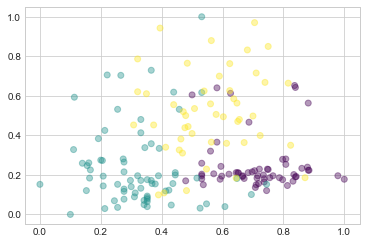

In [498]:
plt.scatter(x2, y2, c=df['Class label'], cmap='viridis', alpha=0.4);

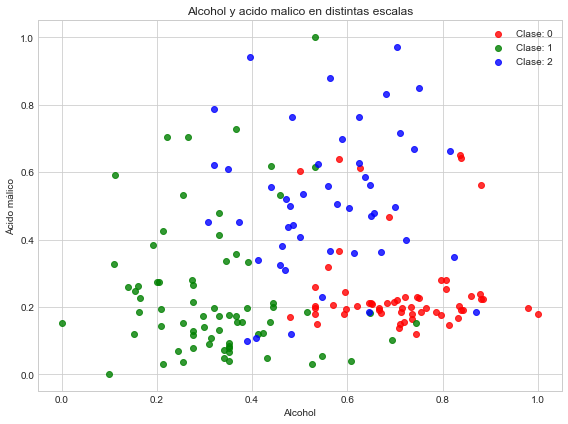

In [499]:
# Como están en el mismo orden que el dataframe, podemos usar los índices de este para saber la clase a la que pertenece:

from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))

colores = ['r', 'g', 'b']

for clase_vino in range(len(colores)):
    df_aux = df[df['Class label'] == clase_vino + 1]
    plt.scatter(np_minmax[df_aux.index, 0], np_minmax[df_aux.index, 1], label = f"Clase: {clase_vino}", c = colores[clase_vino], alpha = 0.8)

plt.title("Alcohol y acido malico en distintas escalas")
plt.xlabel("Alcohol")
plt.ylabel("Ácido málico")
plt.legend()

plt.tight_layout()
plt.show()

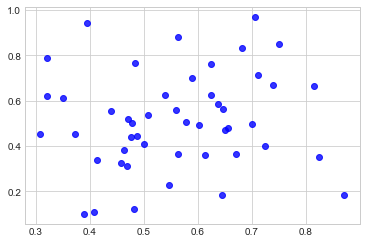

In [502]:
clase_vino = 2

df_aux = df[df['Class label'] == clase_vino + 1]
plt.scatter(np_minmax[df_aux.index, 0], np_minmax[df_aux.index, 1], label = f"Clase: {clase_vino}", c = colores[clase_vino], alpha = 0.8)

## Aproximaciones "a mano"

Por supuesto, también podemos codificar las ecuaciones para la estandarización y el escalado Min-Max "a mano". Sin embargo, los métodos scikit-learn siguen siendo útiles si estamos trabajando con conjuntos de datos de prueba y entrenamiento y deseamos escalarlos por igual, ya que en un proyecto end-to-end de Machine Learning, separaremos unos datos para entrenar el modelo y otros para predicción, los cuáles no podrán ser vistos antes de predecir ni transformar.

Para ello, seguiríamos la siguiente sintaxis:
<pre>
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
</pre>



<br>
Si quisiéramos calcularlo a mano, es decir, bien con la forma propia de Python o bien con NumPy, deberíamos seguir las siguientes fórmulas:


  - Estandarización: \begin{equation} z = \frac{x - \mu}{\sigma} \end{equation} 

con media:  

\begin{equation}\mu = \frac{1}{N} \sum_{i=1}^N (x_i)\end{equation}

y desviación estándar:  

\begin{equation}\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}\end{equation}

  - Escalado Min-Max: \begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}




## Ejercicio

Antes de pasar a realizar un ejercicio para estandarizar nuestros datos, sería conveniente que nos pegáramos con el cálculo manual de las cosas. Por ello, a continuación, deberás realizar la estandarización y el escalado Min-Max, tanto con funciones nativas de Python trabajando sobre una lista, como con funciones de NumPy utilizando arrays.

Pese a que parece una pérdida de tiempo, de este modo repasaremos no solo los conceptos más básicos sino que entenderemos qué estamos haciendo.

Para ello, utilizaremos las variables ``x`` definidas en cada celda, que será el conjunto de datos a escalar:

#### Python

In [532]:
# Estandarización:
import numpy as np

np.random.seed(10)

x = list(np.random.randint(1, 20, size=100))

# g = lambda x: [(a - sum(x)/len(x))/(sum([(x_i - sum(x)/len(x))**2 for x_i in x])/len(x))**(1/2) for a in x]
# g(x)

def fun_media(x):
    return sum(x)/len(x)

def fun_std(x):
    x_media = fun_media(x)
    x_sum = []
    for x_i in x:
        x_sum.append((x_i - x_media)**2)

    return (sum(x_sum)/len(x_sum))**(1/2)

def f_std(x):
    x_mean = fun_media(x)
    x_std = fun_std(x)
    x_list = []
    for i in x:
        x_list.append((i-x_mean)/x_std)
    return x_list

       
f_std(x) 


[-0.3403808619135096,
 -1.2553831788853098,
 0.7576219184526507,
 -1.98738503246275,
 1.1236228452413708,
 0.9406223818470107,
 1.1236228452413708,
 -0.5233813253078696,
 -0.3403808619135096,
 -1.98738503246275,
 -0.15738039851914953,
 -0.5233813253078696,
 -1.2553831788853098,
 0.9406223818470107,
 -1.2553831788853098,
 0.7576219184526507,
 0.02562006487521051,
 0.02562006487521051,
 -1.80438456906839,
 -0.5233813253078696,
 -1.2553831788853098,
 0.5746214550582907,
 1.1236228452413708,
 0.3916209916639306,
 -1.0723827154909498,
 0.3916209916639306,
 0.3916209916639306,
 0.20862052826957056,
 -1.80438456906839,
 -1.2553831788853098,
 1.3066233086357308,
 0.3916209916639306,
 0.02562006487521051,
 -0.15738039851914953,
 -0.3403808619135096,
 0.7576219184526507,
 1.3066233086357308,
 0.9406223818470107,
 -0.7063817887022297,
 0.02562006487521051,
 1.1236228452413708,
 0.5746214550582907,
 -0.7063817887022297,
 0.02562006487521051,
 -1.80438456906839,
 -1.98738503246275,
 0.2086205282695

In [536]:
def minmax(x):
    x_list = []
    for i in x:
        x_list.append((i-min(x))/(max(x)-min(x)))
    return x_list

minmax(x)

[0.5,
 0.2222222222222222,
 0.8333333333333334,
 0.0,
 0.9444444444444444,
 0.8888888888888888,
 0.9444444444444444,
 0.4444444444444444,
 0.5,
 0.0,
 0.5555555555555556,
 0.4444444444444444,
 0.2222222222222222,
 0.8888888888888888,
 0.2222222222222222,
 0.8333333333333334,
 0.6111111111111112,
 0.6111111111111112,
 0.05555555555555555,
 0.4444444444444444,
 0.2222222222222222,
 0.7777777777777778,
 0.9444444444444444,
 0.7222222222222222,
 0.2777777777777778,
 0.7222222222222222,
 0.7222222222222222,
 0.6666666666666666,
 0.05555555555555555,
 0.2222222222222222,
 1.0,
 0.7222222222222222,
 0.6111111111111112,
 0.5555555555555556,
 0.5,
 0.8333333333333334,
 1.0,
 0.8888888888888888,
 0.3888888888888889,
 0.6111111111111112,
 0.9444444444444444,
 0.7777777777777778,
 0.3888888888888889,
 0.6111111111111112,
 0.05555555555555555,
 0.0,
 0.6666666666666666,
 0.2777777777777778,
 0.2222222222222222,
 0.3888888888888889,
 1.0,
 0.6666666666666666,
 0.1111111111111111,
 0.4444444444444444

#### NumPy

In [537]:
# Estandarización:
import numpy as np

np.random.seed(10)

x = np.random.randint(1, 20, size=100)


def f_std_2(x):
    return (x-np.mean(x))/np.std(x)

f_std_2(x)

array([-0.34038086, -1.25538318,  0.75762192, -1.98738503,  1.12362285,
        0.94062238,  1.12362285, -0.52338133, -0.34038086, -1.98738503,
       -0.1573804 , -0.52338133, -1.25538318,  0.94062238, -1.25538318,
        0.75762192,  0.02562006,  0.02562006, -1.80438457, -0.52338133,
       -1.25538318,  0.57462146,  1.12362285,  0.39162099, -1.07238272,
        0.39162099,  0.39162099,  0.20862053, -1.80438457, -1.25538318,
        1.30662331,  0.39162099,  0.02562006, -0.1573804 , -0.34038086,
        0.75762192,  1.30662331,  0.94062238, -0.70638179,  0.02562006,
        1.12362285,  0.57462146, -0.70638179,  0.02562006, -1.80438457,
       -1.98738503,  0.20862053, -1.07238272, -1.25538318, -0.70638179,
        1.30662331,  0.20862053, -1.62138411, -0.52338133,  0.75762192,
        0.39162099,  0.75762192, -0.88938225, -0.1573804 ,  0.02562006,
        0.94062238,  0.20862053, -1.98738503,  1.12362285,  0.75762192,
        0.20862053, -0.52338133, -0.1573804 ,  0.39162099,  0.02

In [538]:
def minmax_2(x):
    return (x-min(x))/(max(x)-min(x))

minmax_2(x)

array([0.5       , 0.22222222, 0.83333333, 0.        , 0.94444444,
       0.88888889, 0.94444444, 0.44444444, 0.5       , 0.        ,
       0.55555556, 0.44444444, 0.22222222, 0.88888889, 0.22222222,
       0.83333333, 0.61111111, 0.61111111, 0.05555556, 0.44444444,
       0.22222222, 0.77777778, 0.94444444, 0.72222222, 0.27777778,
       0.72222222, 0.72222222, 0.66666667, 0.05555556, 0.22222222,
       1.        , 0.72222222, 0.61111111, 0.55555556, 0.5       ,
       0.83333333, 1.        , 0.88888889, 0.38888889, 0.61111111,
       0.94444444, 0.77777778, 0.38888889, 0.61111111, 0.05555556,
       0.        , 0.66666667, 0.27777778, 0.22222222, 0.38888889,
       1.        , 0.66666667, 0.11111111, 0.44444444, 0.83333333,
       0.72222222, 0.83333333, 0.33333333, 0.55555556, 0.61111111,
       0.88888889, 0.66666667, 0.        , 0.94444444, 0.83333333,
       0.66666667, 0.44444444, 0.55555556, 0.72222222, 0.61111111,
       0.05555556, 1.        , 0.72222222, 0.44444444, 0.5    

## Ejercicio

Fácil, ¿verdad? Pues ahora veamos algo aún más sencillo, vamos a hacer este escalado con ayuda de la librería scikit-learn, como hemos visto unos aprtados más arriba. Para ello, leeremos el dataset del Titanic y vamos a estandarizar todo aquellos que creas susceptible de estandarizar. En este caso, como estamos practicando, créate 2 DataFrames a los que aplicarle los diferentes métodos vistos.

Si tienes nulos en alguna variable que creas que se puede estandarizar, aplica alguno de los métodos vistos en clase.

In [543]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("../../data/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [549]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("../../data/titanic.csv")
df1 = df.copy()

df['Age'].fillna(df['Age'].mean(), inplace=True)
df1['Age'].fillna(df['Age'].mean(), inplace=True)

scaler = preprocessing.StandardScaler()
df_std = scaler.fit_transform(df1[['Age', 'Fare']])

minmax = preprocessing.MinMaxScaler()
df_minmax = minmax.fit_transform(df1[['Age', 'Fare']])

df['Age_std'] = df_std[:, 0]
df['Fare_std'] = df_std[:, 1]
df['Age_mm'] = df_minmax[:, 0]
df['Fare_mm'] = df_minmax[:, 1]

df[['Age', 'Age_std', 'Age_mm', 'Fare', 'Fare_std', 'Fare_mm']]

,Age,Age_std,Age_mm,Fare,Fare_std,Fare_mm
0,22.000000,-5.924806e-01,0.271174,7.2500,-0.502445,0.014151
1,38.000000,6.387890e-01,0.472229,71.2833,0.786845,0.139136
2,26.000000,-2.846632e-01,0.321438,7.9250,-0.488854,0.015469
3,35.000000,4.079260e-01,0.434531,53.1000,0.420730,0.103644
4,35.000000,4.079260e-01,0.434531,8.0500,-0.486337,0.015713
...,...,...,...,...,...,...
886,27.000000,-2.077088e-01,0.334004,13.0000,-0.386671,0.025374
887,19.000000,-8.233437e-01,0.233476,30.0000,-0.044381,0.058556
888,29.699118,-3.827555e-15,0.367921,23.4500,-0.176263,0.045771
889,26.000000,-2.846632e-01,0.321438,30.0000,-0.044381,0.058556


## Análisis de Componentes Principales (PCA)

Puede que algunos recordéis que hace unas cuántas clases, cuando veíamos ciertas visualizaciones de gráficos de dispersión, se utilizó un método que convertía las 64 dimensiones de unas imágenes de entrada de un algoritmo en solamente 2, que nos permitiían capta la mayoría de información de cada imagen. Esta técnica no era nada más ni nada menos que el PCA (Principal Component Analysis), el cuál discutiremos en profundidad a continuación:

### ¿Qué es?

El Análisis de Componentes Principales (PCA por susu siglas en inglés, _Principal Component Analysis_) es una técnica de extracción de características (conocido en la literatura anglosajona como _Feature Extraction_) donde combinamos las entradas de una manera específica para eliminar algunas dimensiones que apenas nos aportan información sobre nuestros datos, manteniendo la parte más importante todas las variables. Además, tras aplicar el PCA conseguiremos que todas las nuevas variables sean independientes una de otra, lo cual es bueno para aplicar los posteriores modelos.

Las técnicas que se utilizan en los proyectos de Machine Learning se ven favorecidas por el uso de grandes volúmenes de datos porque podrán "aprender más". Sin embargo, si el volumen viene dado por variables que apenas aportan información (o nada), lo único para lo que servirán será para que nuestro algoritmo pierda tiempo, se lie y, probablemente, acabe tardando más y con un peor desempeño. Por eso existen los algoritmos de selección de características (como PCA, pero veremos más en el futuro), que analizan los datos de entrada, los clasifican en distintos subconjuntos y definen una métrica con la que valorar la relevancia de la información aportada por cada uno de ellos. Luego, descartarán del dataset de trabajo aquellas características o campos que menos información aportan, permitiendo un ahorro en almacenamiento de datos, y tiempo de ejecución que se traduce en una mayor eficiencia del modelo.


Teóricamente, podríamos definir el PCA como una técnica de selección de características que utiliza una transformación ortogonal para convertir un conjunto de observaciones de variables, posiblemente correlacionadas, en un conjunto más reducido de variables que ya no guardan correlación y que se conocen como componentes principales.

Como se puede extraer de esta definición, las matemáticas detrás de esto son complejas, por lo que daremos una explicación intuitiva y pasaremos a verlo aplicado sobre un conjunto de datos sencillo.

### Principios básicos del PCA

El análisis de componentes principales es un proceso que analiza los datos e intenta encontrar la esencia de la información contenida en ellos. Esta estructura se define por las direcciones donde la varianza de los datos es mayor, es decir, donde hay una mayor dispersión de éstos. La forma más sencilla de comprender este concepto es mediante una visualización.

Si los triángulos son los datos, la dirección que representa la mayor varianza es la línea sobre la cual la dispersión de los datos es mayor. Si tomamos una línea vertical y proyectamos los datos sobre ella, vemos que los datos no están tan "separados" como cuando hacemos la misma operación sobre una línea horizontal. Por tanto, en este ejemplo concreto, el componente principal es la línea horizontal, que corresponde a una mayor varianza.


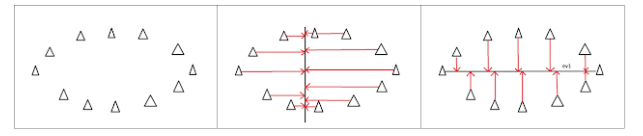

Pues del mismo modo que hemos hecho esta deducción de manera gráfica, se pueden obtener conclusiones muchos más precisas con el uso de las matemáticas. Para ello, nos basaremos en los autovectores y autovalores (eigenvectors y eigenvalues) de nuestros datos. Podemos entender el autovector como una dirección, y el autovalor será un número que represente el valor de la varianza en esa dirección. Por tanto el componente principal será el autovector con mayor autovalor (en el ejemplo, la línea horizontal).

En un conjunto de datos hay tantas parejas autovector/autovalor como dimensiones. Los autovectores no modifican los datos, sino que permiten verlos desde un punto de vista diferente, más relacionado con la estructura interna de los datos, y, por tanto, ofrecen una visión mucho más intuitiva de éstos.

Cabe destacar, que si bien el PCA nos sirve para reducción de varaibles, también nos permite transformar los ejes de representación para adaptarlos a los datos y entenderlos de mejor forma, como se puede ver en la siguiente representación:

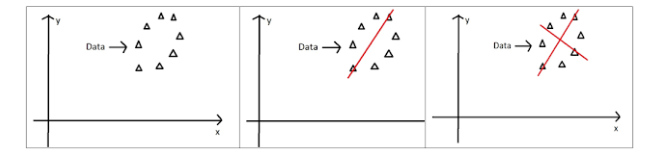

Dando lugar a la siguiente representación en función de los nuevos ejes:

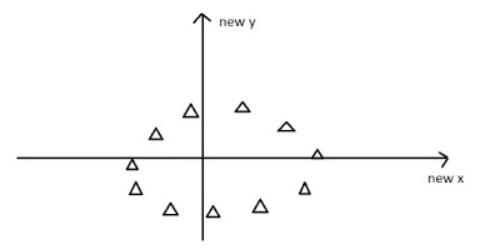

Pero nuestro objetivo principal con el PCA nos erá este.

## EXTRA: Ejemplo Visual

Como parece que no ha quedado muy claro, me ha dado por añadir esto a ver si se capta la idea.

Imaginemos un conjunto de datos como el que tenemos a continuación:

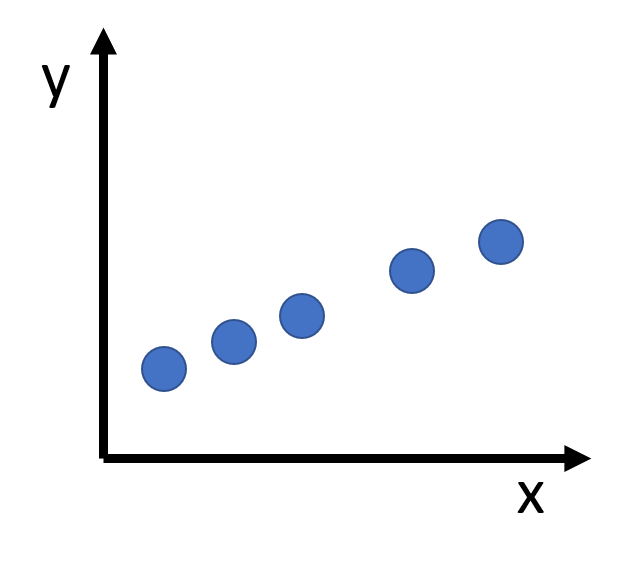


Como se puede observar, es una distribución de datos en 2 dimensiones. Sin embargo, podríamos querer reducir esto a una sola dimensión. Debido a cómo están distribuidos los datos, es posible encontrar un solo eje (1 dimensión = 1 eje) que capte la esencia de los datos sin apenas perder nada de información:


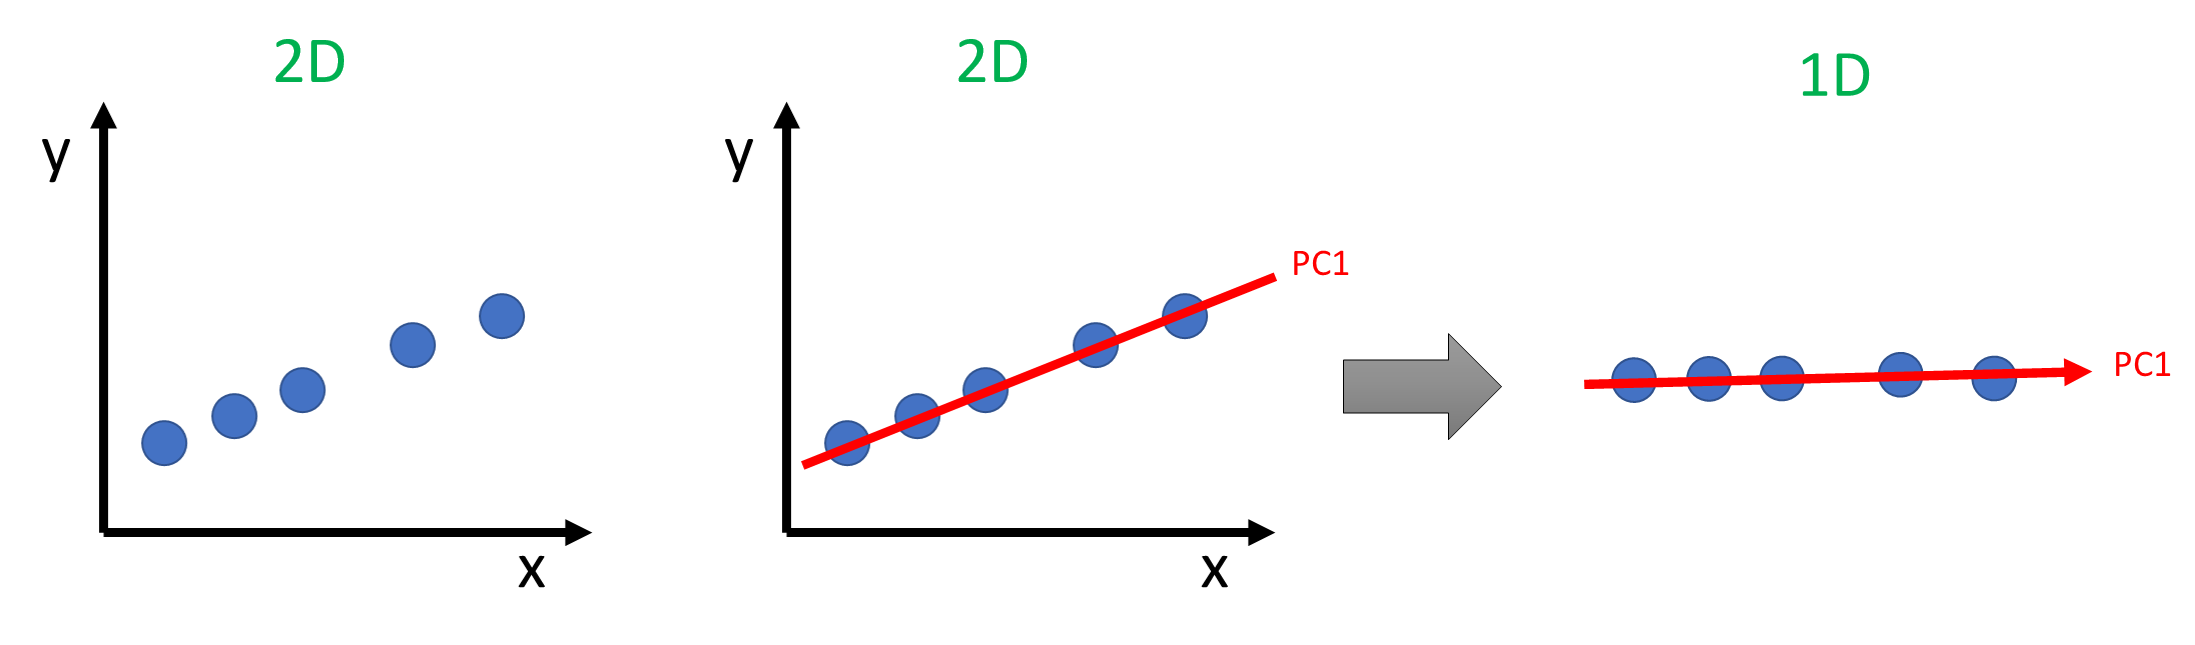

Como has comprobado, los datos se ajustan a la perfección a este nuevo eje. Esta nueva dimensión será posible obtenerla a partir de una combinación de los ejes X e Y que componen el plano original. De este modo, hemos podido reducir de 2 dimensinoes a 1 sola dimensión sin apenas perder nada de información.

Esto ha sido posible gracias a que hemos encontrado un eje que se adaptaba a la perfección (porque los datos siguen una relación lineal), sin embargo, si hubiéramos elegido cualquier otro eje (es decir, si en vez de una línea con esa inclinación, hubiéramos elegido otra con mucha más pendiente, por ejemplo), los resultados hubieran sido muy diferentes. Por eso trataremos de buscar el eje que mejor se adapte a nuestros datos, que maemáticamente será el que mayor varianza de nuestros datos recoja, es decir, el que tenga más porción de su recta con datos.

Todo esto es muy bonito desde el punto de vista utópico que hemos planteado. Sin embargo, en la realidad, difícilmente veremos un caso así. Lo normal es que suframos cierta pérdida de información (que la minimizaremos, pero seguirá siendo pérdida de información). Por ejemplo, podríamos tener algo así:

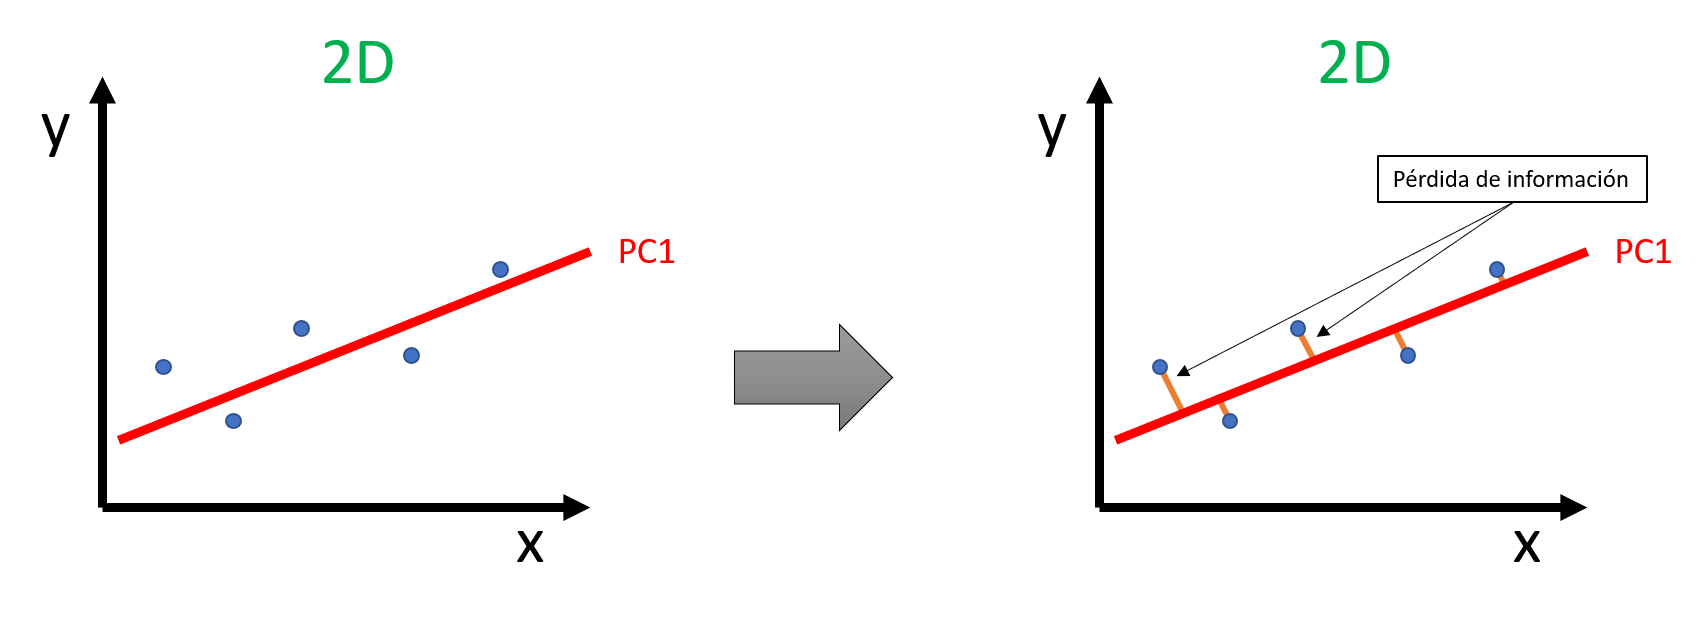

Pues, lo que hacemos al buscar el eje que mejor se adapte, es calcular aquel que supone meor périda de información, lo que se consigue si es el que refleja la mayor variación de los datos.

### Usos del PCA

Al identificar claramente cuáles son las variables o características que aportan más información, se pueden descartar aquellas menos relevantes, reduciendo así la dimensionalidad del conjunto de datos de trabajo. De esta forma, al igual que hemos comentado anteriormente, se simplifica el problema y se agiliza todo el proceso de modelado, lo que redunda en una mayor eficiencia del proceso.

Como venimos anunciando desde el comienzo, la reducción de dimensionalidad es una de sus aplicaciones principales. Por ejemplo, en un análisis de calificaciones escolares que consideraba las notas de los alumnos en 8 asignaturas diferentes (lengua, matemáticas, física, inglés, historia, química y gimnasia), se determinó que 2 de los componentes principales explicaban juntos el 81% de la varianza. El primer componente estaba fuertemente correlacionado con las asignaturas de humanidades, mientras que el segundo, lo estaba con las de ciencias. Ambos conjuntos eran estadísticamente independientes (un alumno puede tener buenas notas en sólo uno de ellos, en los dos o en ninguno). De esta forma, se pudo simplificar el análisis de este conjunto de datos, de trabajar con un problema de 8 dimensiones, a otro de 2.


Por otra parte, también se suele utilizar para la detección de anomalías. Uno de los ejemplos típicos de esta aplicación es la detección de fraude en transacciones bancarias. En estas situaciones, es fácil tener un gran volumen de datos de transacciones correctas. Lo difícil es tener suficientes datos de transacciones fraudulentas con las que entrenar el modelo. La detección de anomalías basada en PCA resuelve el problema analizando las características o atributos que definen lo que corresponde a un comportamiento normal, para después aplicar distintas métricas de distancia que identifiquen los casos que se alejan de este comportamiento, es decir, los casos anómalos.

### Limitaciones del PCA

Una de las principales limitaciones de PCA surge cuando los datos están expresados en distintas escalas. Por ello, **siempre se suele hacer una normalización o estandarización previa**. ¿Qué sorpresa que esto sea importante, eh? Por eso te lo acabo de explicar ;).

Por otro lado, sólo se consideran transformaciones ortogonales (rotaciones) de las variables originales.

Por último, este método asume que los datos siguen una distribución normal o gaussiana, como muchos fenómenos naturales y humanos.


## Pasemos a la acción

Una vez ya hemos sentado las bases de este algoritmo, podemos pasar a su implementación en Python, intentando pasar al lado de las matemáticas pero sin darse de bruces con ella.

En este caso, utilizaremos un dataset muy sencillo (solo 4 variables), a la par que conocido en el mundo del Machine Learning, y que utilizaremos repetidas veces en el futuro. Se trata del dataset de clasificación de iris, descargable desde el repositorio UCI, que contiene medidas de longitud y anchura de los pétalos y sépalos de 150 flores de 3 especies diferentes (Iris-setosa, Iris-versicolor, Iris-virginica):

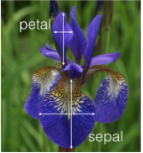


### Pasos a seguir

Pues como ya tenemos todo bien planteado, podemos pasar a la acción, para lo que estableceremos un plan de actuación:

1. Cargar los datos
2. Normalizar
3. Calcular autovectores y autovalores (con la matriz de covarianza)
4. Seleccionar los autovectores de las componentes principales
5. Proyectar el dataset original sobre el nuevo espacio de dimensión

#### 1. Cargando los datos

El primer paso, como en cualquiera de los ejercicios que hemos hecho hasta ahora, es cargar los datos y librerías que vamos a usar en nuestro análisis:


In [1060]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['lng sepalo','anch sepalo','lng petalo','anch petalo','especie'])

df

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Ahora, separamos las variables que vamos a reducir (las 4 primeras columnas) de la variable objetivo (que nos dice la clase de la flor).

In [1061]:
X = df.iloc[:,0:4].values
# la submatriz x contiene los valores de las primeras 4 columnas del dataframe y todas las filas

y = df.iloc[:,4].values
# El vector y contiene los valores de la 4 columna (especies de flor) para todas las filas

In [1063]:
# X

#### 2. Normalización

Como acabamos de ver, cuando las distintas características o atributos de un dataset están expresadas en distintas escalas, se hace patente la necesidad de normalizar sus valores. En este caso, en el que las medidas de sépalos y pétalos están expresadas en centímetros, no sería imprescindible. Sin embargo, como hemos comentado cuando hablábamos de las limitaciones del PCA, decíamos que para aplicar esta técnica se asume que los datos de trabajo tienen una distribución gaussiana o normal.  Por tanto, tendremos que aplicar a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza igual a 1. Para ello, usaremos la transformación Standardscaler de sklearn que hemos visto al comienzo de este notebook.


In [1064]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [886]:
X_std.T.shape

(4, 150)

#### 3. Cálculo de autovectores y autovalores (eigenvector/eigenvalue)

Como hemos comentado en la parte teórica, los autovectores son las direcciones en las que la varianza de los datos es mayor.

Basándonos en la teoría de probabilidad, la varianza  de una variable aleatoria es una medida de dispersión (definida como la esperanza del cuadrado de la desviación de dicha variable respecto a su media). Por tanto, las direcciones en las que la varianza es mayor,  representan la "esencia" principal de la información contenida en el dataset, por eso se les llama componentes principales. Al igual que un autovector es una dirección, el autovalor es un número, que representa el valor de la varianza sobre ese autovector.

Por ello, para encontrar las componentes principales que condensen esa "esencia" de la información del dataset, calcularemos primero la matriz de covarianza, que nos da la medida de dispersión conjunta entre variables.

Para calcular la matriz de covarianza, utilizaremos la función de NumPy ``np.cov()``:



In [887]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Como ya hemos visto, las direcciones sobre las que la varianza es mayor (lo que significa mayor dispersión de los datos, es decir, mayor información) se corresponde con los autovectores, vectores propios o _eigenvectors_ de esta matriz. Por tanto, el siguiente paso consiste en calcular estas direcciones.

(Si quieres aprender las matemáticas que hay detrás de estos cálculos, te dejo un enlace donde encontrarás una explicación que lo hace fácil: https://fisicaymates.com/autovalores-y-autovectores-de-una-matriz/)

In [1068]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [905]:
df.mean()

lng sepalo     5.843333
anch sepalo    3.054000
lng petalo     3.758667
anch petalo    1.198667
dtype: float64

In [904]:
df2 = pd.DataFrame(X_std)
df2.columns = df.columns[:-1]
df2
df2['PC1'] = 0.52237162

,lng sepalo,anch sepalo,lng petalo,anch petalo
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


Como queremos reducir la dimensionalidad del dataset perdiendo la menor información posible, descartaremos los autovectores cuyos autovalores sean más bajos, ya que son aquellos que menos información aportan al conjunto global. Para ello, lo que se hace es ordenarlos por parejas de (autovector, autovalor).

In [889]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
2.930353775589316
0.9274036215173427
0.14834222648163983
0.020746013995595787


#### 4. Nos quedamos con los autovectores de las componentes principales

El objetivo de este caso es proyectar este dataset de 4 dimensiones en un espacio de menor dimensionalidad, para mejorar la eficiencia de cálculo al mismo tiempo que se retiene la mayor parte de la información. La pregunta clave será ¿cuál va ser este valor? ¿3D? ¿2D? ¿1D? Para ello seguiremos el siguiente proceso.

Una vez ordenados los autovalores, que recordamos son una medida de la varianza de los datos, la cuestión es decidir, cuál es el menor número de autovectores o componentes principales, con el que podemos expresar "la esencia principal" de la información contenida en ese dataset. Para ello, usaremos una métrica que se conoce como "varianza explicada", que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

Para ello, utilizaremos el siguiente código:

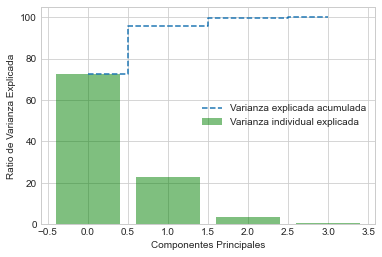

In [890]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
plt.figure(figsize=(6, 4))
plt.bar(range(4), var_exp, alpha=0.5, align='center',
        label='Varianza individual explicada', color='g')
plt.step(range(4), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend()

In [955]:
cum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

In [915]:
len(cum_var_exp[cum_var_exp<98])+1

3

In [914]:
cum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

En la gráfica se aprecia claramente que la mayor parte de la varianza (en torno al 70%) corresponde a la primera componente. La segunda acumula algo más del 20% de la varianza, mientras que la tercera y la cuarta pueden ser descartadas sin perder demasiada información, ya que las dos primeras componentes explican más del 90% de la varianza.

#### Proyección de los datos sobre un espacio de menor dimensión

En este caso, construiremos una matriz de proyección que convertirá el conjunto de datos inicial (de 4 dimensiones) en un conjunto de datos de 2 dimensiones centrado en las sus componentes principales (las direcciones de los autovectores correspondientes). De esta forma, la tarea de interpretar los patrones de información contenidos en los datos, será mucho más sencilla.

Para ello, primero creamos la matriz de proyección a partir de los autovalores principales con el siguiente código:

In [891]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [892]:
Y

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

Finalmente, representamos gráficamente el nuevo espacio de datos:

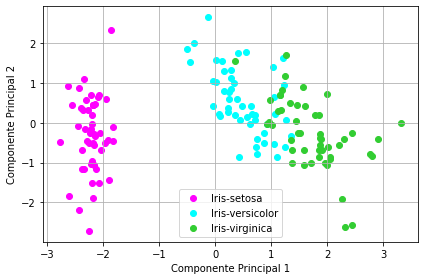

In [173]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('magenta', 'cyan', 'limegreen')):
    plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

##### ¿Y qué hubiera pasado si hubiéramos utilizado una combinación que no fuese la mejor?

In [176]:
#Generamos la matríz a partir de los pares autovalor-autovector
mal_matrix_w = np.hstack((eig_pairs[2][1].reshape(4,1),
                      eig_pairs[3][1].reshape(4,1)))

print('Matriz W mala:\n', mal_matrix_w)

mal_Y = X_std.dot(mal_matrix_w)

Matriz W mala:
 [[-0.72101681  0.26199559]
 [ 0.24203288 -0.12413481]
 [ 0.14089226 -0.80115427]
 [ 0.6338014   0.52354627]]


Finalmente, representamos gráficamente el nuevo espacio de datos:

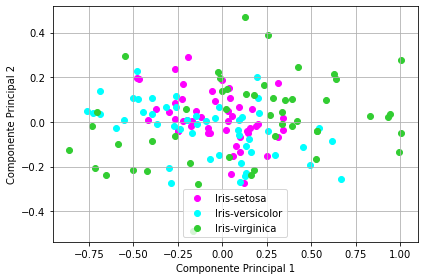

In [177]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('magenta', 'cyan', 'limegreen')):
    plt.scatter(mal_Y[y==lab, 0], mal_Y[y==lab, 1], label=lab, c=col)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

Como podemos comprobar, la diferencia es considerable, siendo muchísimo más diferenciable en el primer caso, que no en el segudno, donde es indescifrable.

In [956]:
l_num = [1, 2, 3, 4]
l_num_txt = ['uno', 'dos', 'tres', 'cuatro']

for num, num_txt in zip(l_num, l_num_txt):
    print(f"El número {num} se llama {num_txt}")
    
print("--------------------------") 
    
for i in range(len(l_num)):
    print(f"El número {l_num[i]} se llama {l_num_txt[i]}")
    
    
# for t in zip(l_num, l_num_txt):
#     print(f"El número {t[0]} se llama {t[1]}")


El número 1 se llama uno
El número 2 se llama dos
El número 3 se llama tres
El número 4 se llama cuatro
--------------------------
El número 1 se llama uno
El número 2 se llama dos
El número 3 se llama tres
El número 4 se llama cuatro


In [935]:
l_clase = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
l_color = ('magenta', 'cyan', 'limegreen')

for lab, col in zip(l_clase, l_color):
    print(lab + " " + col)

Iris-setosa magenta
Iris-versicolor cyan
Iris-virginica limegreen


In [939]:
# l_num[False]
l_num

[1, 2, 3, 4]

## EJERCICIO

Bueno, una vez ya hemos visto cómo funciona esto del PCA, es hora de ponerse con ello para practicar lo aprendido. Para ello, vamos a utilizar 2 datasets:

En primer lugar, lee el dataset de coches. Selecciona las variables que mejor te encajen para ser utilizadas para realizar el PCA, y reduce el dataset a solo 2 dimensiones. Una vez realizado, intenta ver si esta reducción permite graficamente una distinción de los diferentes valores de la variable "vs".

In [1116]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [1115]:
import pandas as pd

df = pd.read_csv("../../data/coches.csv")

X = df.copy().iloc[:, [1, 3, 4, 5, 6, 7]].values
X

array([[  21.   ,  160.   ,  110.   ,    3.9  ,    2.62 ,   16.46 ],
       [  21.   ,  160.   ,  110.   ,    3.9  ,    2.875,   17.02 ],
       [  22.8  ,  108.   ,   93.   ,    3.85 ,    2.32 ,   18.61 ],
       [  21.4  ,  258.   ,  110.   ,    3.08 ,    3.215,   19.44 ],
       [  18.7  ,  360.   ,  175.   ,    3.15 ,    3.44 ,   17.02 ],
       [  18.1  ,  225.   ,  105.   ,    2.76 ,    3.46 ,   20.22 ],
       [  14.3  ,  360.   ,  245.   ,    3.21 ,    3.57 ,   15.84 ],
       [  24.4  ,  146.7  ,   62.   ,    3.69 ,    3.19 ,   20.   ],
       [  22.8  ,  140.8  ,   95.   ,    3.92 ,    3.15 ,   22.9  ],
       [  19.2  ,  167.6  ,  123.   ,    3.92 ,    3.44 ,   18.3  ],
       [  17.8  ,  167.6  ,  123.   ,    3.92 ,    3.44 ,   18.9  ],
       [  16.4  ,  275.8  ,  180.   ,    3.07 ,    4.07 ,   17.4  ],
       [  17.3  ,  275.8  ,  180.   ,    3.07 ,    3.73 ,   17.6  ],
       [  15.2  ,  275.8  ,  180.   ,    3.07 ,    3.78 ,   18.   ],
       [  10.4  ,  472.   ,  205. 

In [1025]:
y = df['vs']

In [1007]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 8.80674707e-02, -5.46881413e-01, -2.93681604e-01,
         5.56181756e-01, -5.36753872e-01, -7.86585678e-01],
       [ 8.80674707e-02, -5.46881413e-01, -2.93681604e-01,
         5.56181756e-01, -2.82787955e-01, -4.64134406e-01],
       [ 3.78690124e-01, -9.72578172e-01, -4.84370702e-01,
         4.60588016e-01, -8.35537304e-01,  4.51396883e-01],
       [ 1.52650282e-01,  2.55393248e-01, -2.93681604e-01,
        -1.01155557e+00,  5.58332676e-02,  9.29315733e-01],
       [-2.83283697e-01,  1.09041381e+00,  4.35423768e-01,
        -8.77724333e-01,  2.79920841e-01, -4.64134406e-01],
       [-3.80157915e-01, -1.47604645e-02, -3.49766633e-01,
        -1.62335550e+00,  2.99839737e-01,  1.37844429e+00],
       [-9.93694627e-01,  1.09041381e+00,  1.22061417e+00,
        -7.63011846e-01,  4.09393662e-01, -1.14358530e+00],
       [ 6.37021371e-01, -6.55761545e-01, -8.32097879e-01,
         1.54688051e-01,  3.09346482e-02,  1.25176700e+00],
       [ 3.78690124e-01, -7.04061755e-01, -4.619

In [1008]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.46869587  0.01960744 -0.13114145 -0.36360315  0.78852351 -0.09362196]
 [ 0.46773501 -0.01783952 -0.14328445  0.52460473  0.54764196  0.43041079]
 [ 0.40791302  0.28218469  0.57791631  0.01048451  0.26625415 -0.59075402]
 [-0.37825136  0.40999379  0.62379806  0.10193903 -0.02045805  0.53749128]
 [ 0.45507918 -0.25919321  0.21694048 -0.71763298  0.03000879  0.40343652]
 [-0.21209423 -0.82728053  0.43828876  0.25900587  0.07815771 -0.07302924]]

Eigenvalues 
[4.21369611 1.09465852 0.45326266 0.04974987 0.14276026 0.23337257]


In [1004]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.45507918  0.25919321  0.21694048  0.71763298 -0.40343652  0.03000879]
 [ 0.46773501  0.01783952 -0.14328445 -0.52460473 -0.43041079  0.54764196]
 [ 0.40791302 -0.28218469  0.57791631 -0.01048451  0.59075402  0.26625415]
 [-0.37825136 -0.40999379  0.62379806 -0.10193903 -0.53749128 -0.02045805]
 [-0.46869587 -0.01960744 -0.13114145  0.36360315  0.09362196  0.78852351]
 [-0.21209423  0.82728053  0.43828876 -0.25900587  0.07302924  0.07815771]]

Eigenvalues 
[4.21369611 1.09465852 0.45326266 0.04974987 0.23337257 0.14276026]


In [974]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.213696111756851
1.0946585243256828
0.45326266406798205
0.23337257472359638
0.14276025574498066
0.049749869380908626


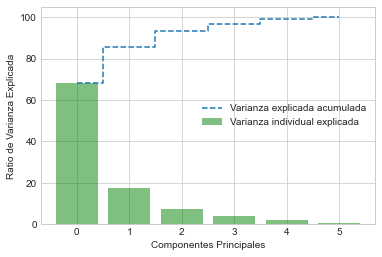

In [993]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
plt.figure(figsize=(6, 4))
plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
        label='Varianza individual explicada', color='g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend()

In [1012]:
var_exp

[68.1001391799087,
 17.691450898192848,
 7.325457197058293,
 3.77167797533085,
 2.307236456484535,
 0.8040382930247857]

In [991]:
n_var = 3
cum_var_exp[n_var-1]

93.11704727515983

In [996]:
cum_var_exp

array([ 68.10013918,  85.79159008,  93.11704728,  96.88872525,
        99.19596171, 100.        ])

In [1000]:
umbral = 90
len(cum_var_exp[cum_var_exp < umbral]) + 1

3

In [1013]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1),
                      eig_pairs[1][1].reshape(6,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[-0.46869587  0.01960744]
 [ 0.46773501 -0.01783952]
 [ 0.40791302  0.28218469]
 [-0.37825136  0.40999379]
 [ 0.45507918 -0.25919321]
 [-0.21209423 -0.82728053]]


In [1014]:
Y

array([[-0.70468072,  0.94649147],
       [-0.65749618,  0.61390757],
       [-1.48017282, -0.07993455],
       [ 0.13904158, -1.28244338],
       [ 1.37824043,  0.04941724],
       [ 0.48672726, -1.98953161],
       [ 2.19113434,  0.83262604],
       [-1.25464129, -1.19077583],
       [-1.54378169, -2.28133641],
       [-0.34740551, -0.0916572 ],
       [-0.31473662, -0.38190104],
       [ 1.54974192, -0.33609307],
       [ 1.30311061, -0.34074616],
       [ 1.43583817, -0.55084254],
       [ 3.43467309, -0.99524191],
       [ 3.48226033, -0.875667  ],
       [ 2.99562815, -0.4204329 ],
       [-2.76812297, -0.32912586],
       [-3.45613641,  0.89049374],
       [-3.23449887, -0.32730251],
       [-1.31394279, -0.89505936],
       [ 1.68180015, -0.28861365],
       [ 1.27782034, -0.16470432],
       [ 2.02735646,  1.37365964],
       [ 1.72408513, -0.12854972],
       [-2.43153124, -0.00538619],
       [-1.95214487,  1.33300569],
       [-2.11225339,  0.96949022],
       [-3.94662443,

Finalmente, representamos gráficamente el nuevo espacio de datos:

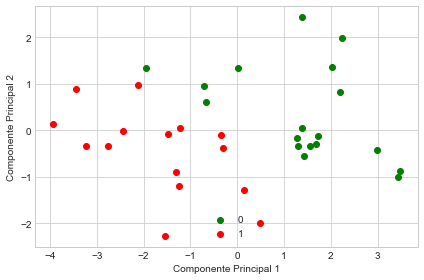

In [1020]:
plt.figure(figsize=(6, 4))
for lab, col in zip((0, 1), ('g', 'r')):
    plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

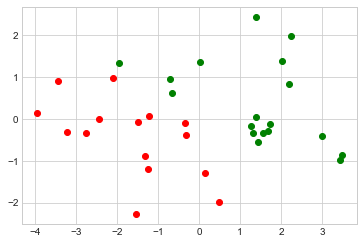

In [1024]:
plt.figure(figsize=(6, 4))
lab = 0
col = 'g'
plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)
lab = 1
col = 'r'
plt.scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col)

Existe una forma más rápida de aplicar el PCA, y es que scikit-learn ya lo tiene incorporado:

In [1011]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=4).fit(X_std)
array_pca = pca.transform(X_std)

array_pca

print("Vectores:")
print(pca.components_)
print("\nVarianza explicada por cada componente:")
print(pca.explained_variance_ratio_)
print("\nVarianza explicada por todas las componentes:")
print(sum(pca.explained_variance_ratio_))

Vectores:
[[ 0.46869587 -0.46773501 -0.40791302  0.37825136 -0.45507918  0.21209423]
 [ 0.01960744 -0.01783952  0.28218469  0.40999379 -0.25919321 -0.82728053]
 [ 0.13114145  0.14328445 -0.57791631 -0.62379806 -0.21694048 -0.43828876]
 [-0.09362196  0.43041079 -0.59075402  0.53749128  0.40343652 -0.07302924]]

Varianza explicada por cada componente:
[0.68100139 0.17691451 0.07325457 0.03771678]

Varianza explicada por todas las componentes:
0.9688872525049066


In [1010]:
array_pca

array([[ 0.70468072,  0.94649147],
       [ 0.65749618,  0.61390757],
       [ 1.48017282, -0.07993455],
       [-0.13904158, -1.28244338],
       [-1.37824043,  0.04941724],
       [-0.48672726, -1.98953161],
       [-2.19113434,  0.83262604],
       [ 1.25464129, -1.19077583],
       [ 1.54378169, -2.28133641],
       [ 0.34740551, -0.0916572 ],
       [ 0.31473662, -0.38190104],
       [-1.54974192, -0.33609307],
       [-1.30311061, -0.34074616],
       [-1.43583817, -0.55084254],
       [-3.43467309, -0.99524191],
       [-3.48226033, -0.875667  ],
       [-2.99562815, -0.4204329 ],
       [ 2.76812297, -0.32912586],
       [ 3.45613641,  0.89049374],
       [ 3.23449887, -0.32730251],
       [ 1.31394279, -0.89505936],
       [-1.68180015, -0.28861365],
       [-1.27782034, -0.16470432],
       [-2.02735646,  1.37365964],
       [-1.72408513, -0.12854972],
       [ 2.43153124, -0.00538619],
       [ 1.95214487,  1.33300569],
       [ 2.11225339,  0.96949022],
       [ 3.94662443,

### EJERCICIO


Ahora, repite el mismo análisis pero para el dataset de los jugadores del FIFA20. Selecciona las variables que mejor te encajen para ser utilizadas para realizar el PCA, y reduce el dataset a solo 2 dimensiones. Una vez realizado, intenta ver si esta reducción permite graficamente una distinción de los diferentes valores de la variable "influencer". ¿Y la variable "preferred_foot"?

In [1026]:
df = pd.read_csv("../../data/FIFA20.csv")
df

,short_name,long_name,dob,club,overall,potential,value_eur,wage_eur,team_position,preferred_foot,influencer
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,FC Barcelona,94,94,95500000,565000,RW,Left,True
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Juventus,93,93,58500000,405000,LW,Right,True
2,Neymar Jr,Neymar da Silva Santos Junior,1992-02-05,Paris Saint-Germain,92,92,105500000,290000,CAM,Right,True
3,J. Oblak,Jan Oblak,1993-01-07,Atlético Madrid,91,93,77500000,125000,GK,Right,False
4,E. Hazard,Eden Hazard,1991-01-07,Real Madrid,91,91,90000000,470000,LW,Right,True
...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,邵帅,1997-03-10,Beijing Renhe FC,48,56,40000,2000,RES,Right,False
18274,Xiao Mingjie,Mingjie Xiao,1997-01-01,Shanghai SIPG FC,48,56,40000,2000,SUB,Right,False
18275,Zhang Wei,张威,2000-05-16,Hebei China Fortune FC,48,56,40000,1000,SUB,Right,False
18276,Wang Haijian,汪海健,2000-08-02,Shanghai Greenland Shenhua FC,48,54,40000,1000,SUB,Right,False


In [1034]:
X = df.copy()[['overall', 'potential', 'value_eur', 'wage_eur']].values
y = df['influencer']

In [1036]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[ 3.99366216,  3.65715595, 16.65362498, 26.01937495],
       [ 3.84977236,  3.49427626, 10.02912625, 18.52562638],
       [ 3.70588256,  3.33139658, 18.44403004, 13.13949459],
       ...,
       [-2.62526846, -2.53227203, -0.43758174, -0.39608877],
       [-2.62526846, -2.8580314 , -0.43758174, -0.39608877],
       [-2.62526846, -3.34667045, -0.43758174, -0.34925284]])

In [1050]:
pca = PCA(n_components=2).fit(X_std)
array_pca = pca.transform(X_std)

In [1051]:
pca.explained_variance_ratio_

array([0.72345507, 0.15806588])

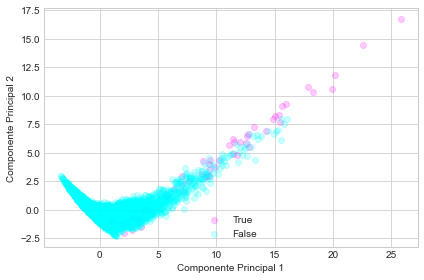

In [1057]:
X = df.copy()[['overall','potential','value_eur','wage_eur']].values
y = df['influencer']

X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2).fit(X_std)
array_pca = pca.transform(X_std)

plt.figure(figsize=(6, 4))
for lab, col in zip((True, False), ('magenta', 'cyan')):
    plt.scatter(array_pca[y==lab, 0], array_pca[y==lab, 1], label=lab , c=col, alpha=0.2)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [1058]:
pca.components_

array([[ 0.4919078 ,  0.46017517,  0.53700654,  0.50782823],
       [-0.37329453, -0.64466063,  0.36841013,  0.55618149]])

In [ ]:
Eigenvectors 
[[-0.4919078  -0.37329453 -0.7861269   0.02612295]
 [-0.46017517 -0.64466063  0.59812324  0.1220659 ]
 [-0.53700654  0.36841013  0.1362761  -0.74654322]
 [-0.50782823  0.55618149  0.07537852  0.65352179]]

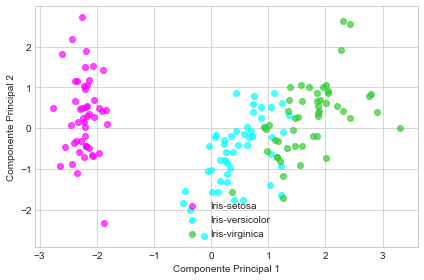

In [1067]:
pca = PCA(n_components=2).fit(X_std)
array_pca = pca.transform(X_std)

plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('magenta', 'cyan', 'limegreen')):
    plt.scatter(array_pca[y==lab, 0], array_pca[y==lab, 1], label=lab , c=col, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [1069]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [1070]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

### EJERCICIO

No parece que se diferencien del todo bien. Mejor definamos nuevas variables e intentemos realizar esa reducción de nuevo. De este modo, aportaremos más información y, aunque perdamos porcentaje de la varianza explicada, puede que ganemos información de los datos. Por ejemplo, añade el año, mes y día de naciemiento de cada jugador; pero puedes añadir las que tú quieras.

### EJERCICIO

¿Ha mejorado respecto a la versión anterior? Pues imagínate si en vez de 2 variables utilizamos 3. Prueba a quedarte con 3 variables y representarlo en un gráfico de 3 dimensiones.

# Discretización (binning)


El problema de trabajar con características numéricas continuas y sin procesar, es que a menudo la distribución de valores en estas características estará sesgada. Esto significa que algunos valores se producirán con bastante frecuencia, mientras que otros serán bastante raros.

Además de esto, también existe otro problema, que es la variación del rango de valores en cualquiera de estas variables. Por ejemplo, el número de reproducciones de videos musicales específicos podría ser anormalmente grande, y algunos podrían ser realmente pequeños. El uso directo de estas funciones puede causar muchos problemas y afectar negativamente al modelo. Por lo tanto, existen estrategias para lidiar con esto, que incluyen agrupaciones y transformaciones.

La discretización (binning en inglés), también conocido como cuantificación, se utiliza para transformar variables numéricas continuas en discretas (categóricas). Estos valores o números discretos se pueden considerar como categorías o contenedores en los que se agrupan los valores numéricos continuos sin procesar. Cada bin representa un grado específico de intensidad y, por lo tanto, incluye un rango específico de valores numéricos continuos. Las estrategias específicas de agrupamiento de datos incluyen agrupamiento de ancho fijo y adaptable.

Por ejemplo, si tenemos una variable que hace referencia a la edad, podríamos agruparla en función de rangos como "Niño", "Adolescente", "Joven", "Adulto", "Senior" y "Jubilado".

Las variables numéricas generalmente se discretizan con métodos de modelado basados en tablas de frecuencia (por ejemplo, árboles de decisión), por lo que la mayoría de veces realizaremos esta técnica ayudándonos de un histograma. Además, el agrupamiento puede mejorar la precisión de los modelos predictivos al reducir el ruido o la no linealidad. Finalmente, la discretización permite identificar fácilmente los valores atípicos, no válidos y nulos de las variables numéricas.

Si bien es cierto que con la discretización perdemos información, puede que le venga mejor a algún que otro algoritmo. Además, es muy útil en casos de variables continuas que parece que están definidas a trozos, ya que la relación que se pueda sacar con los valores continuos directamente podría llevar a error. Un ejemplo de esto podría ser la aceleración de caída libre en la Tierra:

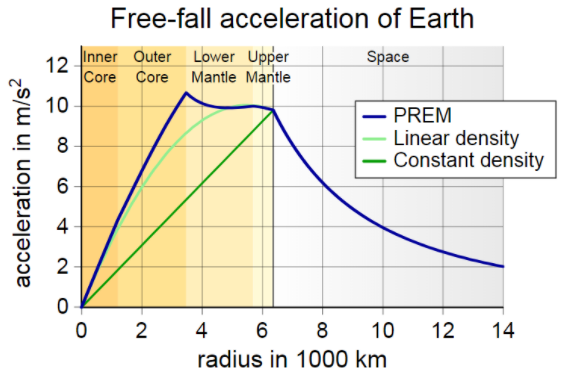

Veamos algunos ejemplos:

In [1210]:
import pandas as pd
fcc_survey_df = pd.read_csv('../../data/fcc_2016_coder_survey_subset.csv', encoding='utf-8', sep=',')
# Quitamos los que no tengan informada la edad:
fcc_survey_df = fcc_survey_df[fcc_survey_df['Age'].notnull()]
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## Discretización de ancho fijo (Fixed-width binning)

La discretización de ancho fijo se basa en hacer grupos del mismo rango de valores, es decir, que la distancia entre los bordes de un bin (grupo) es siempre la misma:

Text(0, 0.5, 'Frequency')

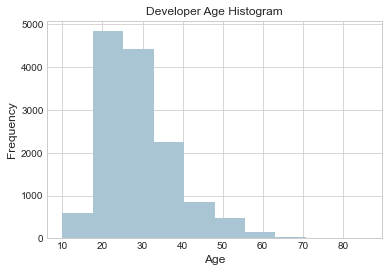

In [1211]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3', bins = 10)
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [1212]:
np.histogram(fcc_survey_df['Age'], bins=10)

(array([ 588, 4840, 4421, 2249,  855,  463,  157,   30,    8,    2],
       dtype=int64),
 array([10. , 17.6, 25.2, 32.8, 40.4, 48. , 55.6, 63.2, 70.8, 78.4, 86. ]))

### Discretización basada en redondeo

Con esta técnica podremos realizar las agrupaciones en base decimal:

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
...
```

In [1213]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age'])/ 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1086,dfa0235969aa40bb0bab4d25c84faa02,24.0,2.0
1087,76813299589baf9ec4ba5a6eb09e1f60,29.0,2.0
1088,cdce6c643620a54ea2c6684f380a707b,27.0,2.0
1089,7e12107eabd416ba2168a0f82a190f51,40.0,4.0
1090,7665a44f944c3df97b9773e77c939f57,34.0,3.0


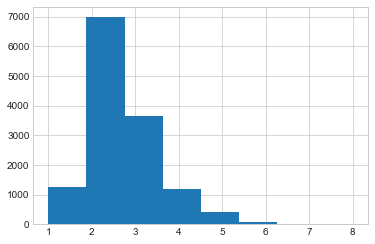

In [1214]:
fcc_survey_df['Age_bin_round'].hist(bins=len(fcc_survey_df['Age_bin_round'].unique()))

### Discretización basada en rangos personalizados

Con este tipo de discretización podremos elegir el tamaño de cada bin (para todos el mismo):

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [1215]:
# Una de las opciones presentes sería utilizar la función de pandas que ya hemos Visto, llamada pd.cut()

bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']),
                                              bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']),
                                              bins=bin_ranges, labels = bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round',
             'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1086,dfa0235969aa40bb0bab4d25c84faa02,24.0,2.0,"(15, 30]",2
1087,76813299589baf9ec4ba5a6eb09e1f60,29.0,2.0,"(15, 30]",2
1088,cdce6c643620a54ea2c6684f380a707b,27.0,2.0,"(15, 30]",2
1089,7e12107eabd416ba2168a0f82a190f51,40.0,4.0,"(30, 45]",3
1090,7665a44f944c3df97b9773e77c939f57,34.0,3.0,"(30, 45]",3


## Discretización basada en cuantiles

Al igual que podemos realizar rangos personalizados, también podemos definirlos en función de otros elementos, como los cuantiles. Para ello, calcularemos el histograma con bins pequeños y representaremos sobre él cada uno de los cuantiles, de modo que veamos gráficamente cómo terminamos llegando a la función ``pd.qcut()``, que también hemos visto:

In [1216]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0, 0.5, 'Frequency')

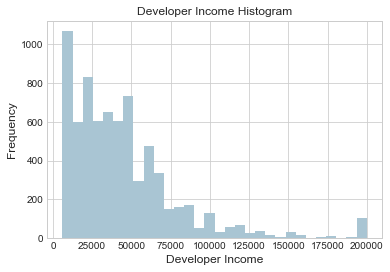

In [1217]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram',  fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [1218]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

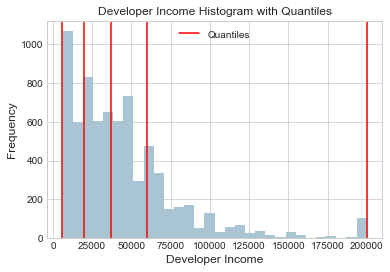

In [1219]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [1220]:
np.nanquantile(fcc_survey_df['Income'], [0, 0.25, 0.5, 0.75, 1])

array([  6000.,  20000.,  37000.,  60000., 200000.])

In [1221]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'],
                                                q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'],
                                                q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income',
              'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


In [1222]:
fcc_survey_df[['ID.x', 'Age', 'Income',
              'Income_quantile_range', 'Income_quantile_label']].iloc[:5]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
0,cef35615d61b202f1dc794ef2746df14,28.0,32000.0,"(20000.0, 37000.0]",25-50Q
1,323e5a113644d18185c743c241407754,22.0,15000.0,"(5999.999, 20000.0]",0-25Q
2,b29a1027e5cd062e654a63764157461d,19.0,48000.0,"(37000.0, 60000.0]",50-75Q
3,04a11e4bcb573a1261eb0d9948d32637,26.0,43000.0,"(37000.0, 60000.0]",50-75Q
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q


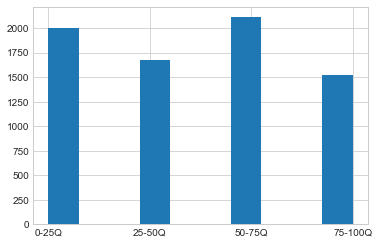

In [1223]:
fcc_survey_df['Income_quantile_label'].sort_values().hist()

## EJERCICIO

Prueba a hacer esto mismo pero con los quantiles del 0.1 al 0.9, y genera un histograma:

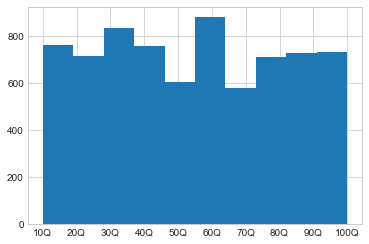

In [1224]:
quantile_list = [x/100 for x in np.arange(0, 101, 10)]
quantile_labels = [f"{x}Q" for x in np.arange(10, 101, 10)]

fcc_survey_df['Income_quantile_range_new'] = pd.qcut(fcc_survey_df['Income'],
                                                q=quantile_list)
fcc_survey_df['Income_quantile_label_new'] = pd.qcut(fcc_survey_df['Income'],
                                                q=quantile_list, labels=quantile_labels)

fcc_survey_df['Income_quantile_label_new'].sort_values().hist()

In [1225]:
fcc_survey_df[['ID.x', 'Age', 'Income',
              'Income_quantile_range_new', 'Income_quantile_label_new']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range_new,Income_quantile_label_new
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 10000.0]",10Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 45000.0]",60Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(30000.0, 37000.0]",50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 45000.0]",60Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(63600.0, 85600.0]",90Q


## EJERCICIO

Lee el dataset del Titanic y utiliza la variable "Age" para realizar agrupaciones, mostrando un histograma acorde:
1. En grupos de 10 años, empezando en 0.
2. En los grupos "Niño" [0-12), "Adolescente" [12-18), "Joven" [18, 30), "Adulto" [30, 60), "Senior" [60, Máx)

3. Haz una agrupación de la variable ``Fare`` redondeando a las decenas de millar

In [1226]:
df = pd.read_csv("../../data/titanic.csv").fillna(0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1227]:
bin_ranges = np.arange(-0.01, max(df['Age'])+11, 10)
bin_ranges

array([-1.000e-02,  9.990e+00,  1.999e+01,  2.999e+01,  3.999e+01,
        4.999e+01,  5.999e+01,  6.999e+01,  7.999e+01,  8.999e+01])

In [1228]:
bin_ranges = np.arange(-0.01, max(df['Age'])+11, 10)
bin_names = range(1, len(bin_ranges))

df['Age_bin'] = pd.cut(np.array(df['Age']), bins=bin_ranges)
df['Age_bin_label'] = pd.cut(np.array(df['Age']), bins=bin_ranges, labels = bin_names)

df[['PassengerId', 'Age', 'Age_bin', 'Age_bin_label']]

,PassengerId,Age,Age_bin,Age_bin_label
0,1,22.0,"(19.99, 29.99]",3
1,2,38.0,"(29.99, 39.99]",4
2,3,26.0,"(19.99, 29.99]",3
3,4,35.0,"(29.99, 39.99]",4
4,5,35.0,"(29.99, 39.99]",4
...,...,...,...,...
886,887,27.0,"(19.99, 29.99]",3
887,888,19.0,"(9.99, 19.99]",2
888,889,0.0,"(-0.01, 9.99]",1
889,890,26.0,"(19.99, 29.99]",3


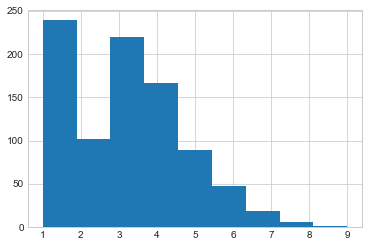

In [1229]:
df['Age_bin_label'].hist(bins=len(df['Age_bin_label'].unique()))

In [1230]:
bin_ranges = [0, 12, 18, 30, 60, max(df['Age'])+1]
bin_names = ['Niño', 'Adolescente', 'Joven', 'Adulto', 'Senior']

df['Age_bin'] = pd.cut(np.array(df['Age']), bins=bin_ranges, right=False)
df['Age_bin_label'] = pd.cut(np.array(df['Age']), bins=bin_ranges, labels = bin_names, right=False)

df[['PassengerId', 'Age', 'Age_bin', 'Age_bin_label']]

,PassengerId,Age,Age_bin,Age_bin_label
0,1,22.0,"[18.0, 30.0)",Joven
1,2,38.0,"[30.0, 60.0)",Adulto
2,3,26.0,"[18.0, 30.0)",Joven
3,4,35.0,"[30.0, 60.0)",Adulto
4,5,35.0,"[30.0, 60.0)",Adulto
...,...,...,...,...
886,887,27.0,"[18.0, 30.0)",Joven
887,888,19.0,"[18.0, 30.0)",Joven
888,889,0.0,"[0.0, 12.0)",Niño
889,890,26.0,"[18.0, 30.0)",Joven


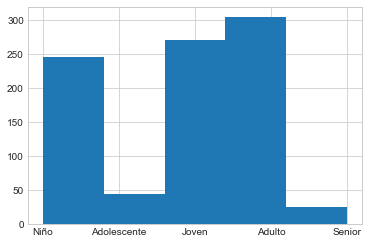

In [1231]:
df['Age_bin_label'].sort_values().hist(bins=len(df['Age_bin_label'].unique()))

In [1232]:
round(513.4, -1)

510.0

In [1253]:
bin_ranges = list(np.arange(0, 261, 10))
bin_ranges = bin_ranges + [max(df['Fare'])+1]
df['Fare_bin']

0       [0.0, 10.0)
1      [70.0, 80.0)
2       [0.0, 10.0)
3      [50.0, 60.0)
4       [0.0, 10.0)
           ...     
886    [10.0, 20.0)
887    [30.0, 40.0)
888    [20.0, 30.0)
889    [30.0, 40.0)
890     [0.0, 10.0)
Name: Fare_bin, Length: 891, dtype: category
Categories (27, interval[float64]): [[0.0, 10.0) < [10.0, 20.0) < [20.0, 30.0) < [30.0, 40.0) ... [230.0, 240.0) < [240.0, 250.0) < [250.0, 260.0) < [260.0, 513.329)]

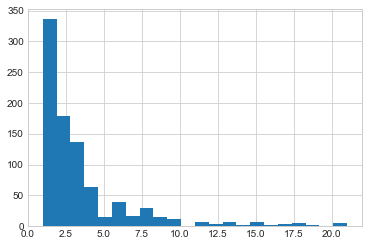

In [1280]:
# fare = df['Fare'].apply(lambda x: round(x, -1))

bin_names = range(1, len(bin_ranges))
# bin_names = range(1, len(bin_ranges))

df['Fare_bin'] = pd.cut(np.array(df['Fare']), bins=bin_ranges, right=False)
df['Fare_labels'] = pd.cut(np.array(df['Fare']), bins=bin_ranges, labels = bin_names, right=False)

df['Fare_labels'].hist(bins=len(bin_ranges))

In [1283]:
df['Fare'].apply(lambda x: round(x, -1)).value_counts()

10.0     440
30.0     135
20.0     100
80.0      31
50.0      30
40.0      28
60.0      25
70.0      19
0.0       17
90.0      13
110.0     11
150.0      9
260.0      6
130.0      4
210.0      4
230.0      4
120.0      4
510.0      3
140.0      3
160.0      2
250.0      2
220.0      1
Name: Fare, dtype: int64

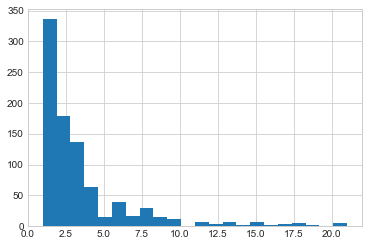

In [1277]:
df_fare = df['Fare'].apply(lambda x: round(x, -1)).unique()
bin_ranges = []
for i in df_fare:
    bin_ranges.append(i)
bin_ranges.sort()
bin_names = range(1, len(bin_ranges))
df['Fare_bin'] = pd.cut(np.array(df['Fare']), bins=bin_ranges, right = False)
df['Fare_bin_label'] = pd.cut(df['Fare'], bins=bin_ranges, labels = bin_names, right = False)
df[['PassengerId', 'Fare','Fare_bin', 'Fare_bin_label']]
df['Fare_bin_label'].sort_values().hist(bins=len(bin_ranges))

In [1268]:
bin_ranges

[0.0,
 10.0,
 20.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 110.0,
 120.0,
 130.0,
 140.0,
 150.0,
 160.0,
 210.0,
 220.0,
 230.0,
 250.0,
 260.0,
 510.0]

In [1257]:
bin_names = bin_ranges[1:]

[0.0,
 10.0,
 20.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 110.0,
 120.0,
 130.0,
 140.0,
 150.0,
 160.0,
 210.0,
 220.0,
 230.0,
 250.0,
 260.0,
 510.0]

## EJERCICIO

Lee el dataset de los futbolistas FIFA20.csv y utiliza la variable "Age" para realizar agrupaciones: en función de los cuantiles: 0.25, 0.5 y 0.75:

## Binarización

A menudo, las frecuencias o los recuentos pueden no ser relevantes para construir un modelo basado en el problema que se está resolviendo. Por ejemplo, si estoy creando un sistema de recomendación para recomendar canciones, solo me gustaría saber si una persona está interesada o ha escuchado una canción en particular. Esto no requiere la cantidad de veces que se ha escuchado una canción, ya que me preocupan más las diversas canciones que ha escuchado. En este caso, se prefiere una función binaria en lugar de una función basada en conteo.

### EJERCICIO

Agrega una columna que incluya esta información, con una nueva columna observada, que tome el valor 1, cuando el recuento de escuchas sea mayor que 0:


In [1289]:
df = pd.read_csv("song_views.csv")
df['escuchado'] = df['listen_count']!=0
df

,user_id,song_id,title,listen_count,escuchado
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,True
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,False
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,False
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,False
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,False
...,...,...,...,...,...
360,42c9fba813dd9ca8ca3673277a0f923b6845a7a6,SOBONKR12A58A7A7E0,You're The One,0,False
361,3f152d355d53865a2ca27ac5ceeffb7ebaea0a26,SOBONKR12A58A7A7E0,You're The One,0,False
362,b4adf5ac8bcba59011df7be840dda1134a47cc30,SOBONKR12A58A7A7E0,You're The One,0,False
363,8f241c98c6cc95ab4a8260ff9b510c2e445a33d7,SOBONKR12A58A7A7E0,You're The One,0,False


# Transformaciones de distribuciones

Y una vez vistas las técnicas anteriores, terminaremos este notebook con las transformaciones de distribuciones. Si lo recuerdas, en su día dijimos que para tener cierta seguridad en las cosas que hacemos con las variables, deberíamos tener distribuciones que se parecieran, en su mayor medida, a distribuciones normales o gaussianas.

Si bien es cierto que esta distribución se encuentra en muchos fenómenos naturales y "humanos", también lo es que los datos no siempre son como nos gustaría, por lo que nos encontraremos algunas distribuciones que no cumplan con estos requisitos.

La tipificación de variables resulta muy útil para eliminar su dependencia respecto a las unidades de medida empleadas. En realidad, una tipificación equivale a una transformación lineal:

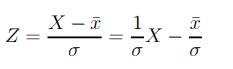

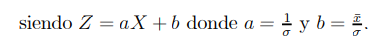

La variable tipificada expresa el número de desviaciones típicas que dista de la media cada observación. Por ello, se puede comparar la posición relativa de los datos de diferentes distribuciones.

Otra situación habitual se presenta cuando se hace un cambio de unidades de medida. A pesar de las buenas propiedades de las transformaciones lineales, éstas no son suficientes para modificar rasgos más complejos de una distribución como por ejemplo la asimetría.

Para ello, se deben hacer transformaciones no lineales.

## Transformaciones no lineales

En función de la asimetría de una variable, podremos utilizar una u otra técnica. Todo dependerá de dónde tengas la asimetría.
  - Si tiene asimetría positiva, es decir, si las frecuencias altas se acumulan hacia el lado izquierdo, se suelen emplear técnicas que extiendan los valores bajos y compriman los altos, tales como:
    - Logaritmo
    - Raíz cuadrada
    - Inversión ($1/x$)
    
    
  - Por otra parte, si la asimetría es negativa, es decir, si las frecuencias altas se acumulan hacia la derecha, se suele emplear la técnica de elevar al cuadrado, que expandirá los datos altos y comprimirá los bajos.
  
  
A continuación, se deja una tabla resumen que recoge esto de forma visual:

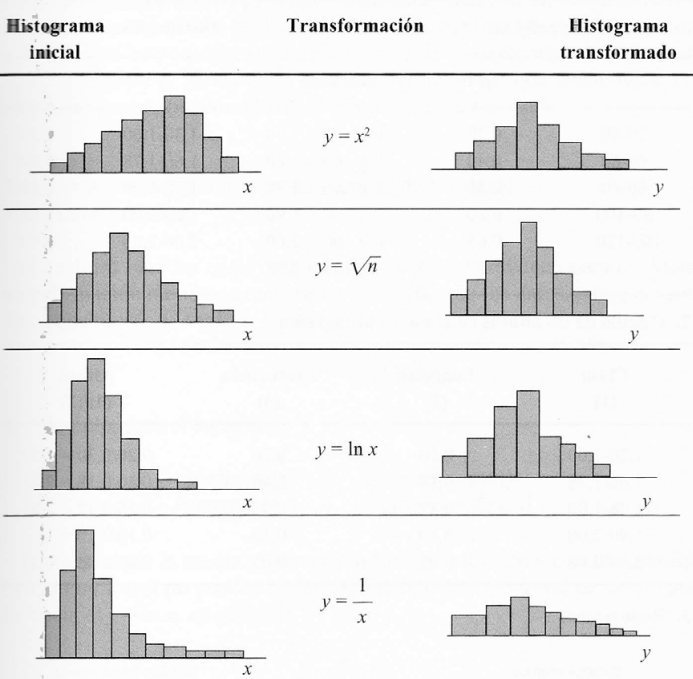

Veamos un ejemplo con cada una de ellas:

### Transformación logarítmica

In [1290]:
fcc_survey_df['Income_log'] = np.log((1 + fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(0, 0.5, 'Frequency')

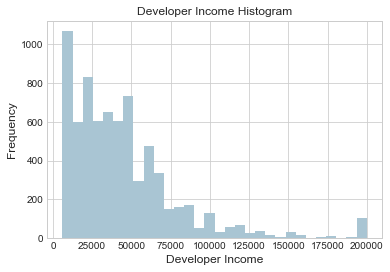

In [1291]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

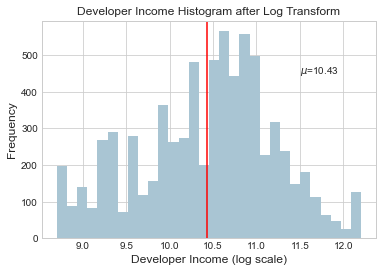

In [864]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$=' +str(income_log_mean), fontsize=10);

### Transformación Raíz cuadrada

In [865]:
fcc_survey_df['Income_sqrt'] = np.sqrt(fcc_survey_df['Income'])
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_sqrt']].iloc[4:9]

,ID.x,Age,Income,Income_sqrt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,77.459667
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,200.000000
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,178.885438
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,200.000000
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,282.842712


Text(0, 0.5, 'Frequency')

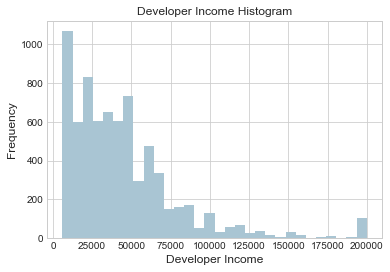

In [866]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_sqrt']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

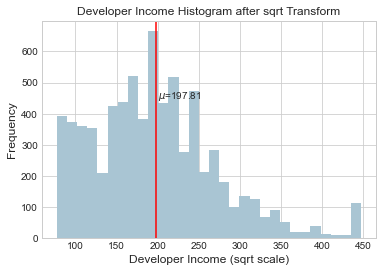

In [867]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_sqrt']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_sqrt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after sqrt Transform', fontsize=12)
ax.set_xlabel('Developer Income (sqrt scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(200, 450, r'$\mu$=' +str(income_log_mean), fontsize=10);

### Transformación Inversa

In [868]:
fcc_survey_df['Income_inv'] = 1/fcc_survey_df['Income']
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_inv']].iloc[4:9]

,ID.x,Age,Income,Income_inv
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,0.000167
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,0.000025
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,0.000031
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,0.000025
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,0.000013


Text(0, 0.5, 'Frequency')

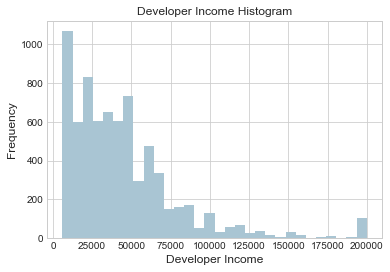

In [869]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

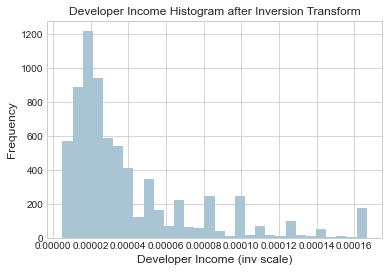

In [870]:
income_inv_mean = np.round(np.mean(fcc_survey_df['Income_inv']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_inv'].hist(bins=30, color='#A9C5D3')
# plt.axvline(income_inv_mean, color='r')
ax.set_title('Developer Income Histogram after Inversion Transform', fontsize=12)
ax.set_xlabel('Developer Income (inv scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Como puedes observar, algunas dan mejor resultados que otras, aunque todo dependerá del dataset utilizado.

### EJERCICIO

Lee el dataframe de jugadores de fútbol y realiza un histograma que muestre el valor de los jugadores. ¿Observas algo que no sea "normal"? Utiliza las téncnicas que hemos visto para transformar esta distribución y normalizarla

### EJERCICIO

Ahora obtén el año de nacimiento de cada jugador, y obtén un histograma de esta nueva variable. ¿Sigue una distribución normal? Si crees que no, ponte manos a la obra y trata de que lo sea.

## Transformación Box–Cox

Las transformaciones de Box y Cox son una familia de transformaciones potenciales usadas en estadística para corregir sesgos en la distribución de errores, para corregir varianzas desiguales (para diferentes valores de la variable predictora) y principalmente para corregir la no linealidad en la relación (mejorar correlación entre las variables)

Esta familia de transformaciones se rige por la siguiente ecuación:

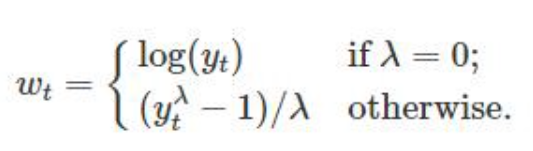

donde ``t`` es el período de tiempo y ``lambda`` es el parámetro que elegimos (también puede realizar la transformación Box-Cox en datos que no sean series temporales).

Fíjate en lo que sucede cuando lambda es igual a 1. En ese caso, nuestros datos se desplazan hacia abajo, pero la forma de los datos no cambia. Por lo tanto, si el valor óptimo de lambda es 1, entonces los datos ya están distribuidos normalmente y la transformación de Box-Cox es innecesaria.

Ahora, lo que puedes estar pensando es ¿y cómo calculo yo ese parámetro lambda? Bueno, pues estás de suerte porque ese trabajo recaerá directamente sobre Python, en concreto, sobre el móulo ``scipy``, tal como se muestra a continuación:

In [1292]:
from scipy import stats

# get optimal lambda value from non null income values
income = np.array(fcc_survey_df['Income'])
income_clean = income[~(np.isnan(income))] # los no nan
l, opt_lambda = stats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11747673253710275


In [1293]:
fcc_survey_df['Income_boxcox_lambda_0'] = stats.boxcox((1+fcc_survey_df['Income']), 
                                                         lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = stats.boxcox(fcc_survey_df['Income'], 
                                                           lmbda=opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 
               'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

C:\Users\TheBridge\anaconda3\lib\site-packages\scipy\stats\morestats.py:1042: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.141045
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.046225
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.281440
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.046225
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.553849


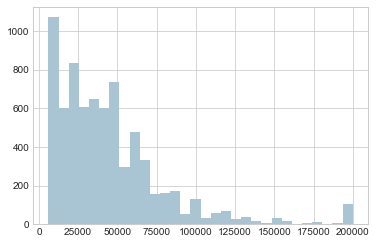

In [696]:
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

Text(24, 450, '$\\mu$=20.65')

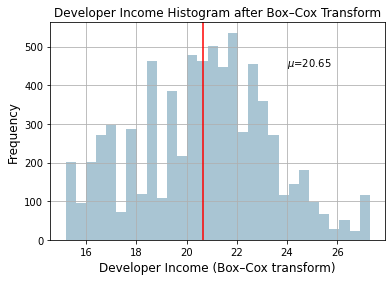

In [427]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)

Como puedes observar, con esta transformación también podemos normalizar nuestros datos.

### EJERCICIO

Lee el dataframe de las ciudades de California y reduce las variables a las mínimas con las que consigas, al menos, el 75% de la varianza explicada. ¿Cuántas variables has cogido? ¿Cuánta varianza explican?

Repite para:
1. Normalizando datos
2. MinMax datos
3. Sin normalizar ni escalar
4. Usando lo que has aprendido: utilizando la transformación que mejor creas que se adapta a cada variable
4. Normalizando datos y utilizando la transformación logarítmica en los casos oportunos
5. Normalizando datos y utilizando la transformación Box-Cox en los casos oportunos
6. Añadiendo 1 variable extra por cada una de las variables utilizadas, que agrupe los valores de cada una de las variables continuas en los grupos que consideres (si no se te ocurre nada, prueba, por ejemplo, con grupos equidistantes).
7. Repite 6 pero con 4 grupos basados en los cuartiles 0.25, 0.5 y 0.75 (0-25%, 25-50%, 50-75%, 75-100%)

In [1294]:
df = pd.read_csv("../../data/california_cities.csv").fillna(0)

df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,0.0,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,0.0,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


Normalización

In [1295]:
X = df.copy().iloc[:, 2:]

In [1296]:
X_std = StandardScaler().fit_transform(X)
X_std

array([[-0.6616846 ,  1.12094857,  2.3886258 , ...,  1.20444505,
        -0.26536935, -0.35793252],
       [-0.84585168,  0.50154913,  0.39740621, ..., -0.27193947,
        -0.26276193, -0.33460462],
       [ 0.72356157, -1.13576803, -0.54456804, ..., -0.18565803,
         2.5104007 ,  3.33062014],
       ...,
       [ 1.32410112, -0.83357776, -0.48422805, ..., -0.06416884,
        -0.25189769, -0.32362678],
       [-0.89945616,  1.30000991,  2.13050475, ...,  0.34339217,
        -0.26823751, -0.35861863],
       [-0.85456392,  1.59456127,  2.89816348, ...,  0.71471687,
        -0.26936739, -0.35999086]])

In [1302]:
pca = PCA(n_components=X.shape[1]).fit(X_std)
array_pca = pca.transform(X_std)

In [1305]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.43729117, 0.62675019, 0.78889172, 0.90621736, 0.9581468 ,
       0.9765031 , 0.99218958, 0.99756737, 0.99987278, 0.99996853,
       0.99999956, 1.        ])

MinMax

In [1307]:
X_std = MinMaxScaler().fit_transform(X)
X_std

array([[2.12831439e-01, 7.06588891e-01, 3.73152709e-01, ...,
        1.19490939e-01, 3.76216570e-04, 3.54693781e-04],
       [1.67791193e-01, 5.69121577e-01, 1.29310345e-01, ...,
        1.66260297e-02, 6.21575202e-04, 4.37455663e-03],
       [5.51609848e-01, 2.05741214e-01, 1.39573071e-02, ...,
        2.26375618e-02, 2.61576838e-01, 6.35965949e-01],
       ...,
       [6.98478930e-01, 2.72808253e-01, 2.13464696e-02, ...,
        3.11021417e-02, 1.64390284e-03, 6.26625680e-03],
       [1.54681581e-01, 7.46329128e-01, 3.41543514e-01, ...,
        5.94983526e-02, 1.06322074e-04, 2.36462521e-04],
       [1.65660511e-01, 8.11700813e-01, 4.35550082e-01, ...,
        8.53698517e-02, 0.00000000e+00, 0.00000000e+00]])

In [1308]:
pca = PCA(n_components=X.shape[1]).fit(X_std)
array_pca = pca.transform(X_std)

In [1309]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.51683299, 0.70539445, 0.85352993, 0.95629115, 0.9726236 ,
       0.98584293, 0.99513038, 0.99789527, 0.99996384, 0.99999089,
       0.99999987, 1.        ])

Sin escalado

In [1311]:
X_std = X.values
X_std

array([[ 3.45761111e+01, -1.17432778e+02,  8.75000000e+02, ...,
         1.45062000e+02,  4.60000000e-02,  3.00000000e-02],
       [ 3.41533333e+01, -1.18761667e+02,  2.81000000e+02, ...,
         2.01840000e+01,  7.60000000e-02,  3.70000000e-01],
       [ 3.77561111e+01, -1.22274444e+02,  0.00000000e+00, ...,
         2.74820000e+01,  3.19830000e+01,  5.37900000e+01],
       ...,
       [ 3.91347222e+01, -1.21626111e+02,  1.80000000e+01, ...,
         3.77580000e+01,  2.01000000e-01,  5.30000000e-01],
       [ 3.40302778e+01, -1.17048611e+02,  7.98000000e+02, ...,
         7.22310000e+01,  1.30000000e-02,  2.00000000e-02],
       [ 3.41333333e+01, -1.16416667e+02,  1.02700000e+03, ...,
         1.03639000e+02,  0.00000000e+00,  0.00000000e+00]])

In [1312]:
pca = PCA(n_components=X.shape[1]).fit(X_std)
array_pca = pca.transform(X_std)

In [1313]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.99997397, 0.99999976, 0.99999988, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [725]:
X = df.iloc[:, 2:].values